In [1]:
# Import necessary libraries
import numpy as np  #Import the numpy library for numerical computing
import pandas as pd #Import the pandas library for data manipulation and analysis
import matplotlib.pyplot as plt #Import matplotlib.pyplot for data visualization
from scipy.signal import periodogram #Import periodogram for frequency analysis

#Import libraries for the model we are using
from sklearn.ensemble import RandomForestClassifier #Import RandomForestClassifier to create our model
#Import evaluation metrics from sklearn.metrics for performance evaluation
from sklearn.metrics import accuracy_score, confusion_matrix, precision_score, ConfusionMatrixDisplay,roc_curve, auc
# Import GridSearchCV and train_test_split functions in order to help choose model hyperparameters and split our data into training and test
from sklearn.model_selection import GridSearchCV,train_test_split 

import seaborn as sns #Import the seaborn library to aid data visualization

In [2]:
#Define function to plot the eeg data with the seizure labels
def plot2(eeg,channelAnno, eegchannel,sfreq, starttime, endtime):
    """
    Plot EEG data with seizure labels.

    Parameters:
        - eeg (DataFrame): the EEG data.
        - channelAnno (DataFrame): the labeled data.
        - eegchannel (str): the channel of EEG you wish to plot.
        - sfreq (int): the sampling frequency.
        - starttime (float): time in seconds of the start time of the EEG data that you wish to plot.
        - endtime (float): time in seconds of the end time of the EEG data that you wish to plot.

    """
    leneeg = len(eeg) #Length of eeg file
    eegst=int(sfreq*starttime) #Calculate the start eeg index
    eeget=int(sfreq*endtime) #Calculate the end eeg index
    #eegtime is the numpy array created that converts the EEG index to seconds, based on the sampling frequency
    eegtime= np.arange(0,leneeg,1)/sfreq 
    fig,ax = plt.subplots(nrows = 1, ncols = 1, figsize=(16,5)) #Set the number of rows and columns to 1 and set the figure size
    eeg_trace = ax.plot(eegtime[eegst:eeget+1], eeg.loc[eegst:eeget,eegchannel],color='blue',label='EEG') # Plot EEG Data
    ax.set_ylabel('$\mu V$',color='blue',fontsize=16) # Set left hand yaxis label to 'Cases'.
    ax.set_xlabel('Seconds',color='green',fontsize=16) # Set left hand yaxis label to 'Cases'.
    ax2 = ax.twinx() # Create a second y axis on the right hand side of the plot using the same x axis.
    annotations = ax2.plot(channelAnno.loc[starttime:endtime,eegchannel],color='red',label='Seizure') # Plot Annotation data.
    ax2.set_ylabel('Seizure',color='red',fontsize=16) # Set right hand yaxis label to 'Deaths'.
    ax2.set_ylim(bottom=0) # Limit the right-hand y axis to start at 0.
    ax2.grid() # Plot a grid for the right hand y axis.
    #Add a legend to show the channel used and the seizure graph
    ax2.legend(eeg_trace + annotations, [eegchannel,'Seizure'], fontsize=16, loc='best') 
    #Add a title to the graph
    ax.set_title('EEG and Anotation',fontsize=16) 
    plt.show()# Show the plot

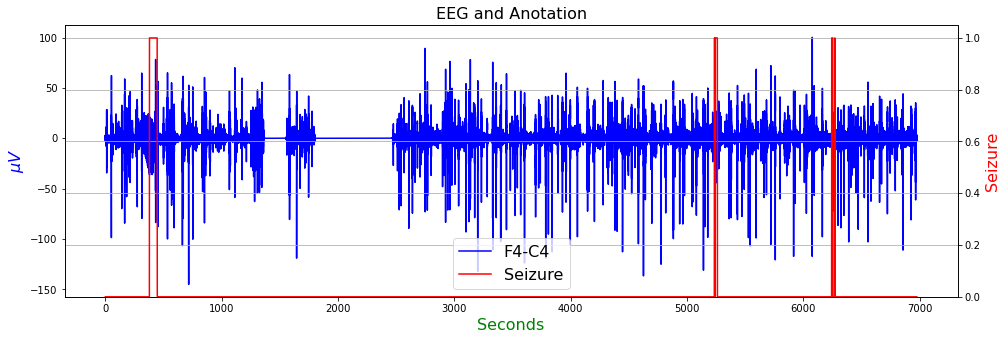

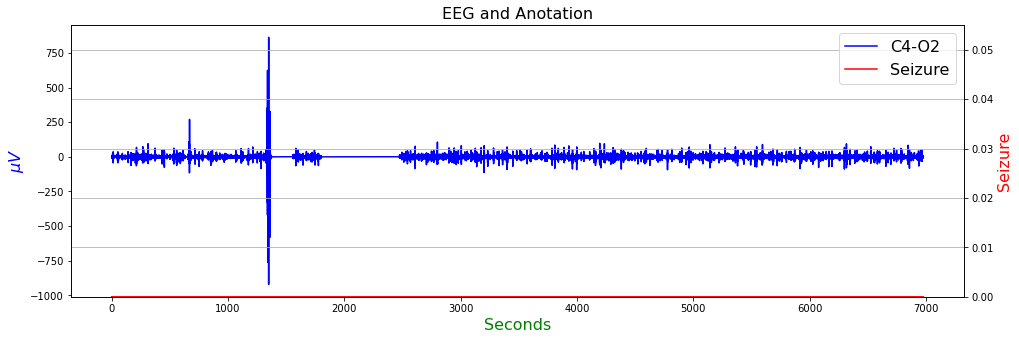

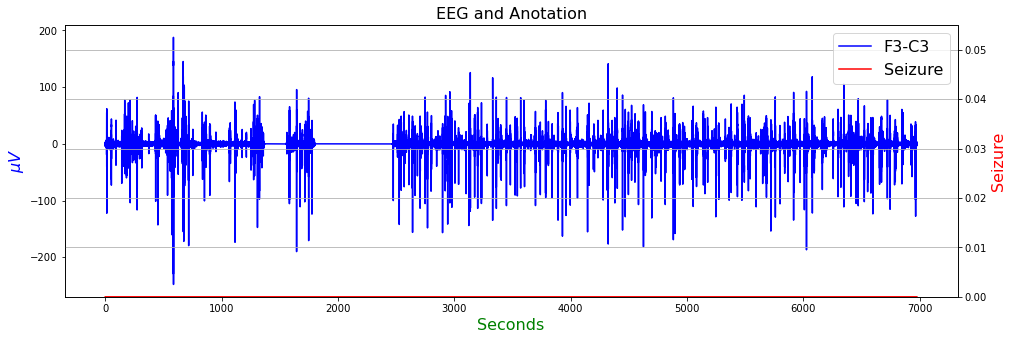

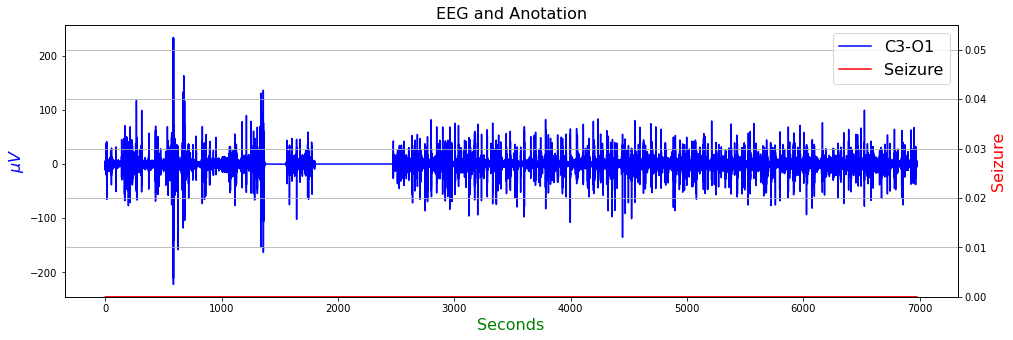

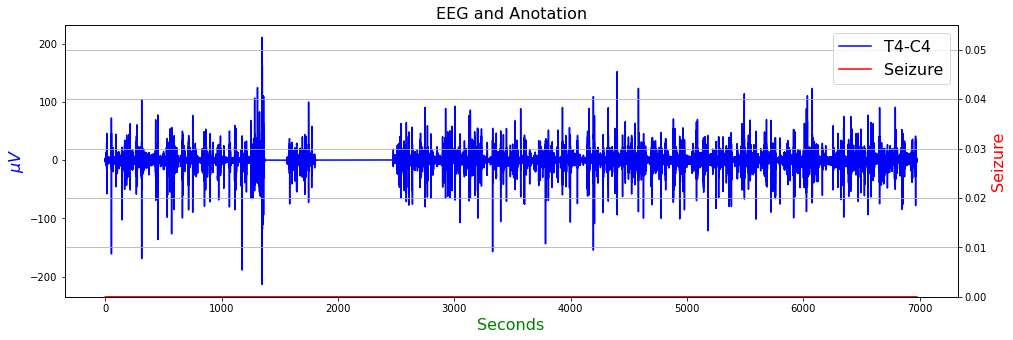

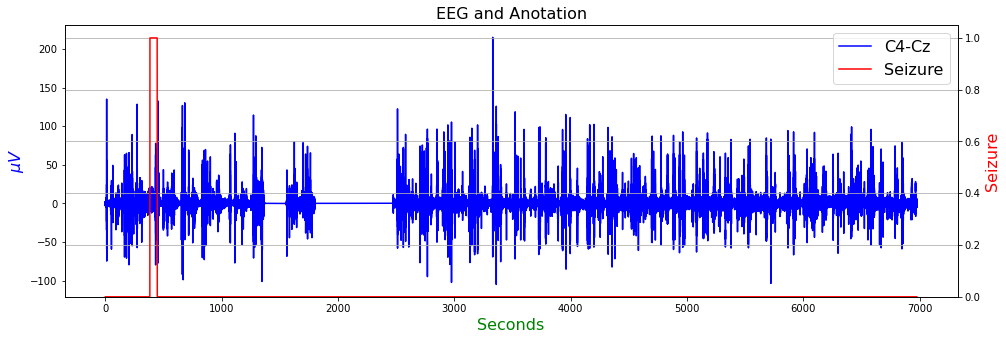

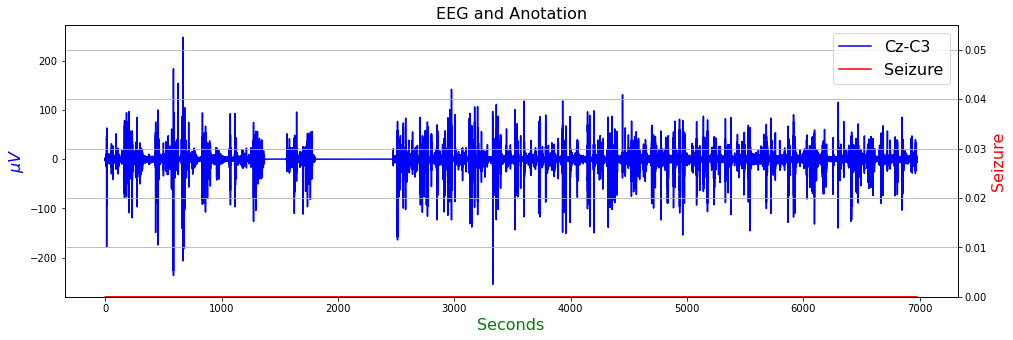

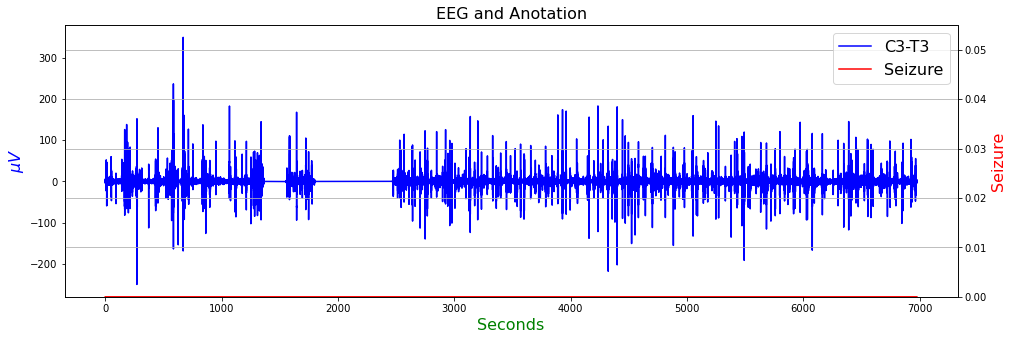

In [3]:
eeg =  pd.read_csv('EEG1_processed.csv')
channelAnno = pd.read_csv('eeg1_Combined_Exper_Annotations.csv').drop("Unnamed: 0",axis = 1)
plot2(eeg, channelAnno,'F4-C4', 32, 0, len(eeg)/32)
plot2(eeg, channelAnno,'C4-O2', 32, 0, len(eeg)/32)
plot2(eeg, channelAnno,'F3-C3', 32, 0, len(eeg)/32)
plot2(eeg, channelAnno,'C3-O1', 32, 0, len(eeg)/32)
plot2(eeg, channelAnno,'T4-C4', 32, 0, len(eeg)/32)
plot2(eeg, channelAnno,'C4-Cz', 32, 0, len(eeg)/32)
plot2(eeg, channelAnno,"Cz-C3", 32, 0, len(eeg)/32)
plot2(eeg, channelAnno,'C3-T3', 32, 0, len(eeg)/32)

# Load in data

In [4]:
#Load in the training data from each csv file as data frame. This is done using the pandas library
eeg1_csv =   pd.read_csv('EEG1_processed.csv')
eeg4_csv =   pd.read_csv('EEG4_processed.csv')
eeg5_csv =   pd.read_csv('EEG5_processed.csv')
eeg7_csv =   pd.read_csv('EEG7_processed.csv')
eeg9_csv =   pd.read_csv('EEG9_processed.csv')
eeg13_csv =   pd.read_csv('EEG13_processed.csv')
eeg14_csv =   pd.read_csv('EEG14_processed.csv')
eeg19_csv =   pd.read_csv('EEG19_processed.csv')
eeg21_csv =   pd.read_csv('EEG21_processed.csv')
eeg31_csv =   pd.read_csv('EEG31_processed.csv')
eeg34_csv =   pd.read_csv('EEG34_processed.csv')
eeg36_csv =   pd.read_csv('EEG36_processed.csv')
eeg38_csv =   pd.read_csv('EEG38_processed.csv')
eeg39_csv =   pd.read_csv('EEG39_processed.csv')
eeg44_csv =   pd.read_csv('EEG44_processed.csv')
eeg47_csv =   pd.read_csv('EEG47_processed.csv')
eeg51_csv =   pd.read_csv('EEG51_processed.csv')

In [5]:
#Load in the test label data for each csv file as a data frome using pandas.
#The drop function is used to remove the unnamed column at the start of each file.
channelAnno_1_csv = pd.read_csv('eeg1_Combined_Exper_Annotations.csv').drop("Unnamed: 0",axis = 1)
channelAnno_4_csv = pd.read_csv('eeg4_Combined_Exper_Annotations.csv').drop("Unnamed: 0",axis = 1)
channelAnno_5_csv = pd.read_csv('eeg5_Combined_Exper_Annotations.csv').drop("Unnamed: 0",axis = 1)
channelAnno_7_csv = pd.read_csv('eeg7_Combined_Exper_Annotations.csv').drop("Unnamed: 0",axis = 1)
channelAnno_9_csv = pd.read_csv('eeg9_Combined_Exper_Annotations.csv').drop("Unnamed: 0",axis = 1)
channelAnno_13_csv = pd.read_csv('eeg13_Combined_Exper_Annotations.csv').drop("Unnamed: 0",axis = 1)
channelAnno_14_csv = pd.read_csv('eeg14_Combined_Exper_Annotations.csv').drop("Unnamed: 0",axis = 1)
channelAnno_19_csv = pd.read_csv('eeg19_Combined_Exper_Annotations.csv').drop("Unnamed: 0",axis = 1)
channelAnno_21_csv = pd.read_csv('eeg21_Combined_Exper_Annotations.csv').drop("Unnamed: 0",axis = 1)
channelAnno_31_csv = pd.read_csv('eeg31_Combined_Exper_Annotations.csv').drop("Unnamed: 0",axis = 1)
channelAnno_34_csv = pd.read_csv('eeg34_Combined_Exper_Annotations.csv').drop("Unnamed: 0",axis = 1)
channelAnno_36_csv = pd.read_csv('eeg36_Combined_Exper_Annotations.csv').drop("Unnamed: 0",axis = 1)
channelAnno_38_csv = pd.read_csv('eeg38_Combined_Exper_Annotations.csv').drop("Unnamed: 0",axis = 1)
channelAnno_39_csv = pd.read_csv('eeg39_Combined_Exper_Annotations.csv').drop("Unnamed: 0",axis = 1)
channelAnno_44_csv = pd.read_csv('eeg44_Combined_Exper_Annotations.csv').drop("Unnamed: 0",axis = 1)
channelAnno_47_csv = pd.read_csv('eeg47_Combined_Exper_Annotations.csv').drop("Unnamed: 0",axis = 1)
channelAnno_51_csv = pd.read_csv('eeg51_Combined_Exper_Annotations.csv').drop("Unnamed: 0",axis = 1)

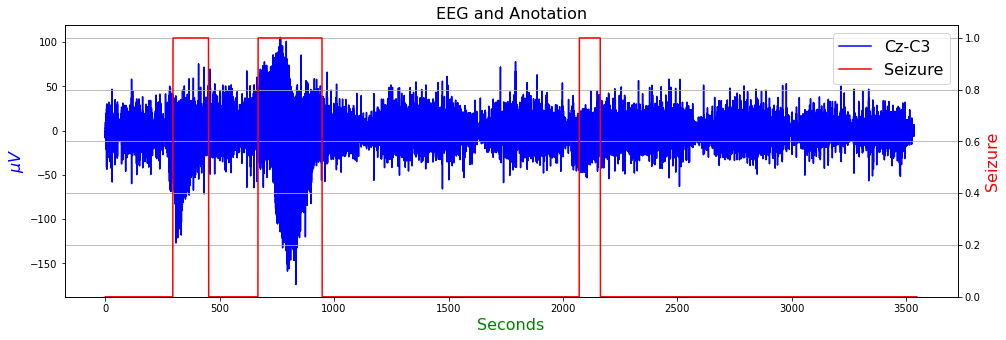

In [6]:
#Plot an example of the data and labels using the plot2 function.
plot2(eeg9_csv,channelAnno_9_csv,'Cz-C3',32, 0, len(eeg1_csv)/32)

In [7]:
dataframes = [eeg1_csv, eeg4_csv, eeg5_csv, eeg7_csv, eeg9_csv, eeg13_csv, eeg14_csv, eeg19_csv, 
              eeg21_csv, eeg31_csv, eeg34_csv, eeg36_csv, eeg38_csv, eeg39_csv, eeg44_csv, 
              eeg47_csv, eeg51_csv]
              
dataframes_labels=[channelAnno_1_csv, channelAnno_4_csv, channelAnno_5_csv, channelAnno_7_csv, channelAnno_9_csv, 
                    channelAnno_13_csv, channelAnno_14_csv, channelAnno_19_csv, channelAnno_21_csv, channelAnno_31_csv, 
                    channelAnno_34_csv, channelAnno_36_csv, channelAnno_38_csv, channelAnno_39_csv, channelAnno_44_csv, 
                    channelAnno_47_csv, channelAnno_51_csv]

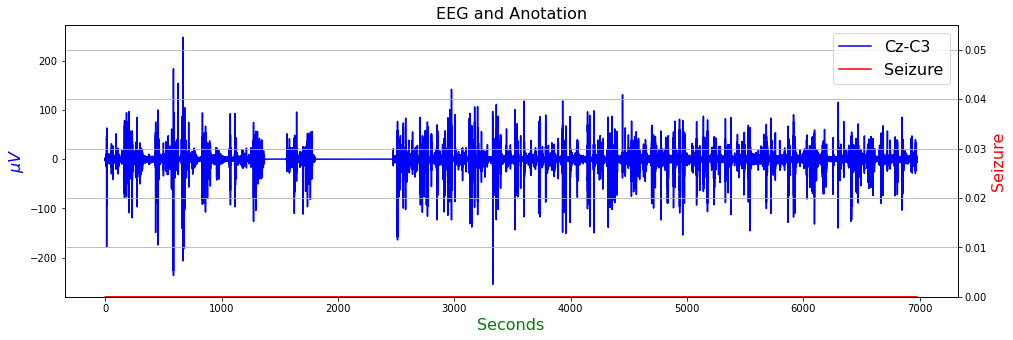

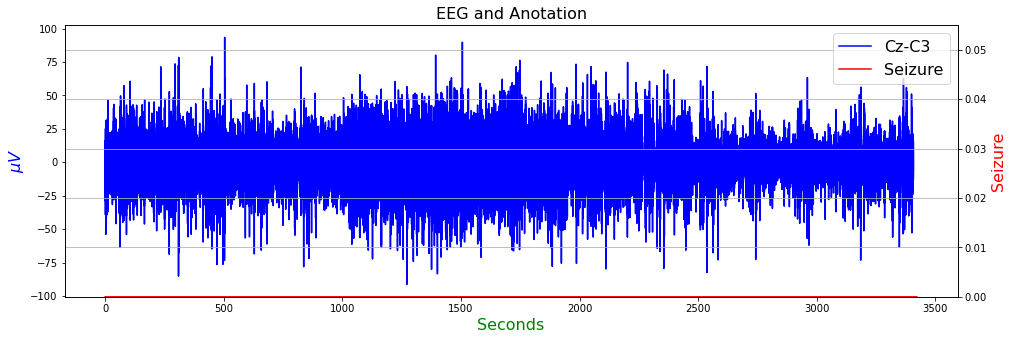

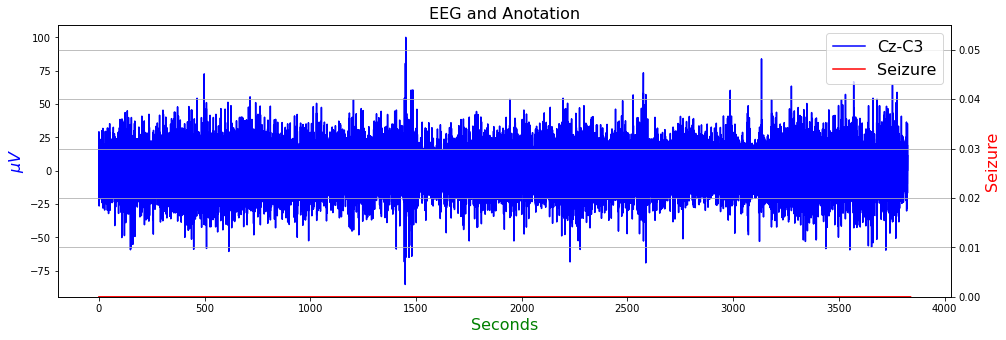

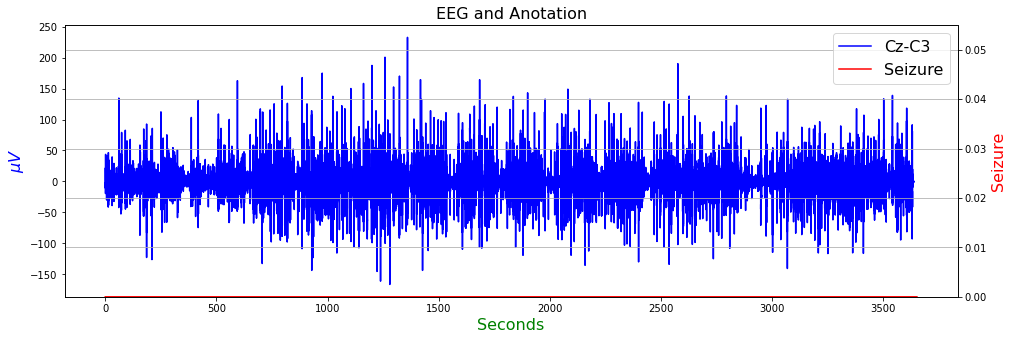

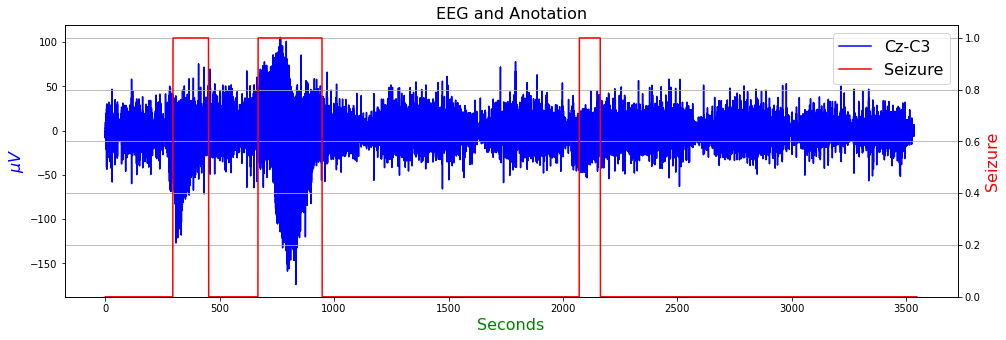

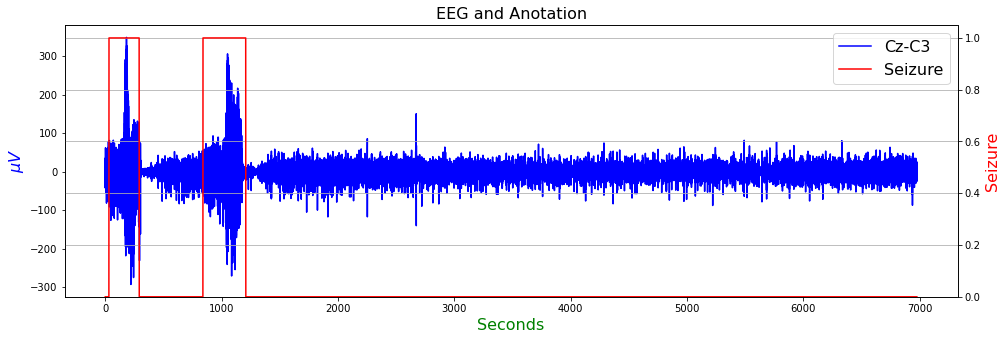

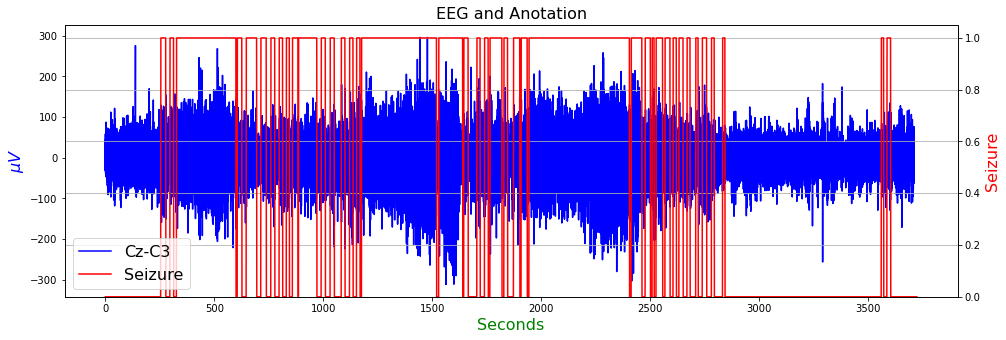

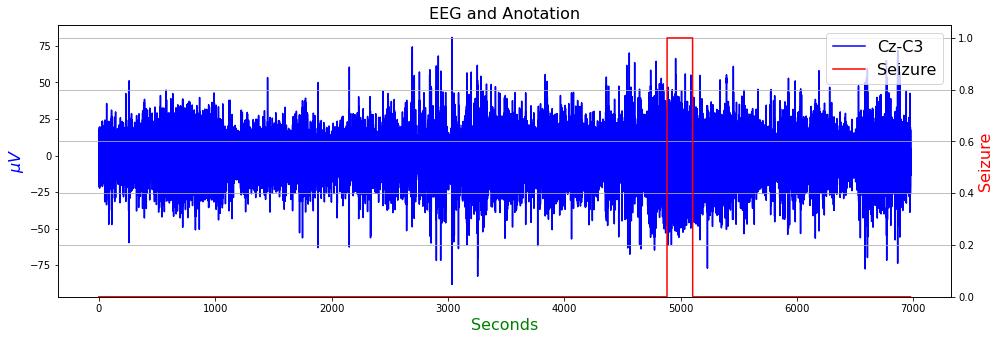

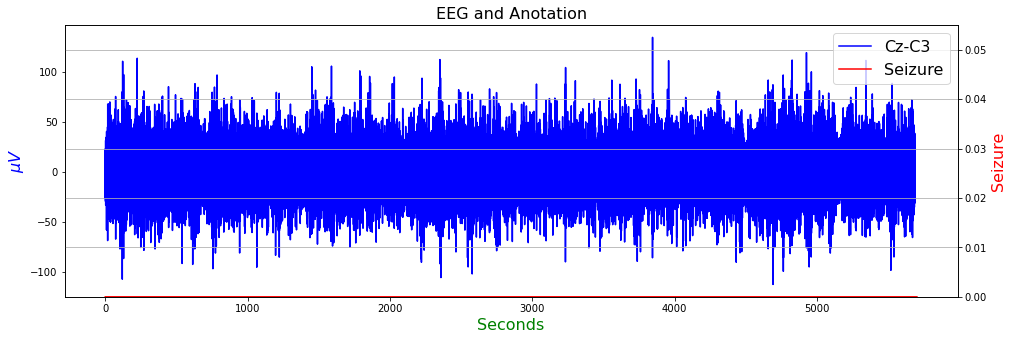

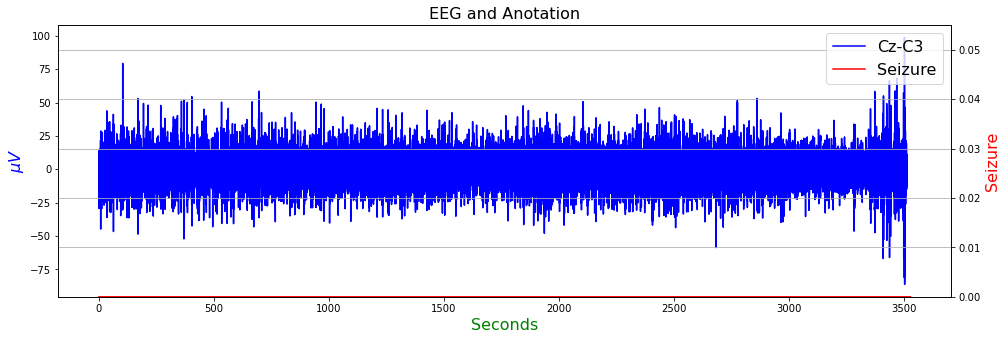

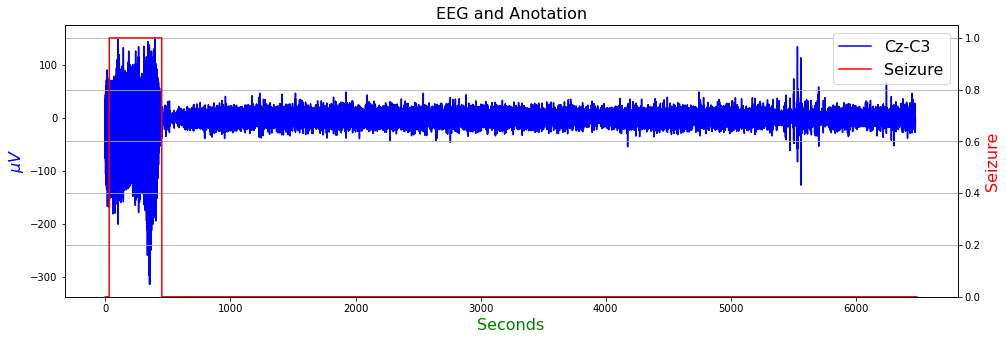

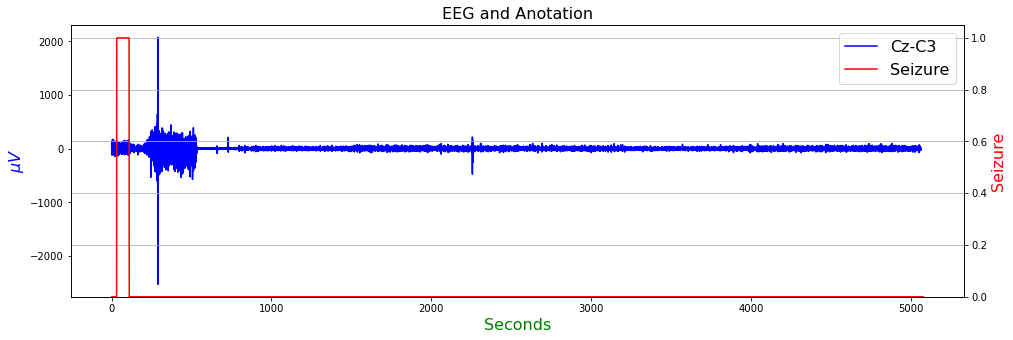

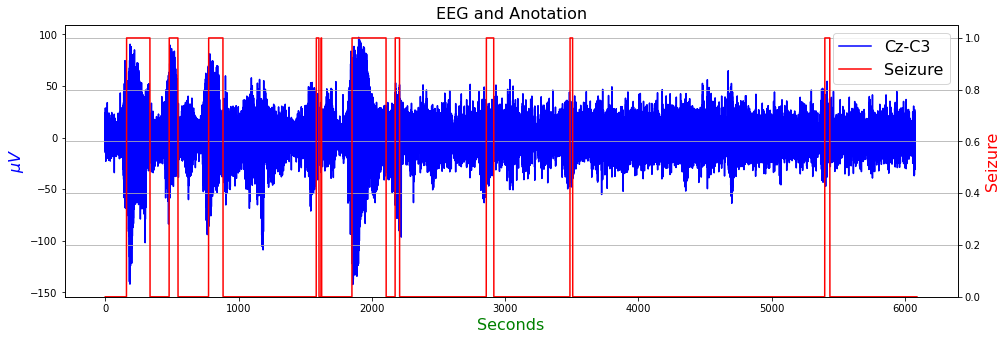

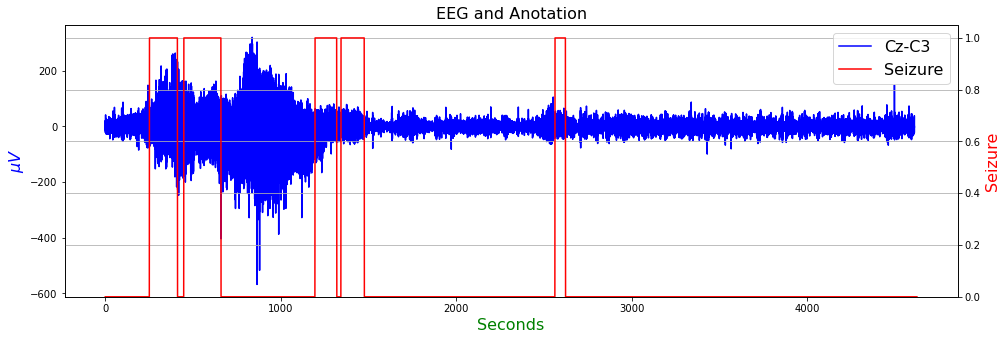

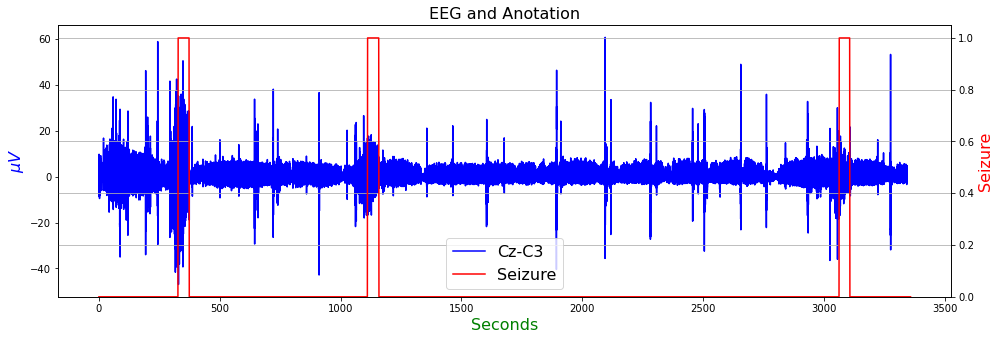

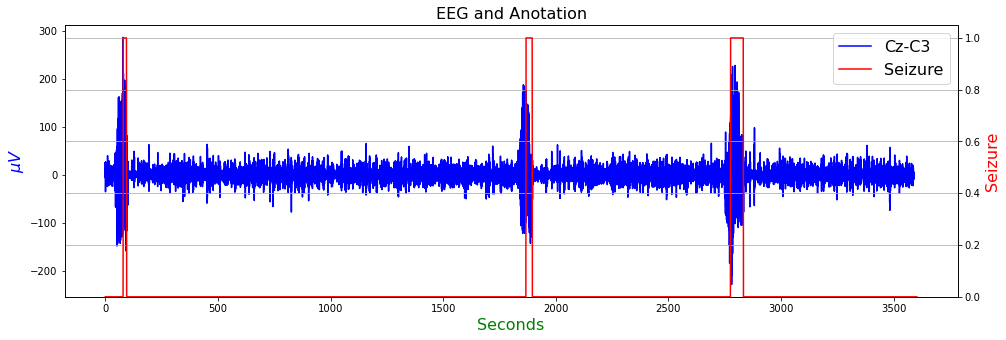

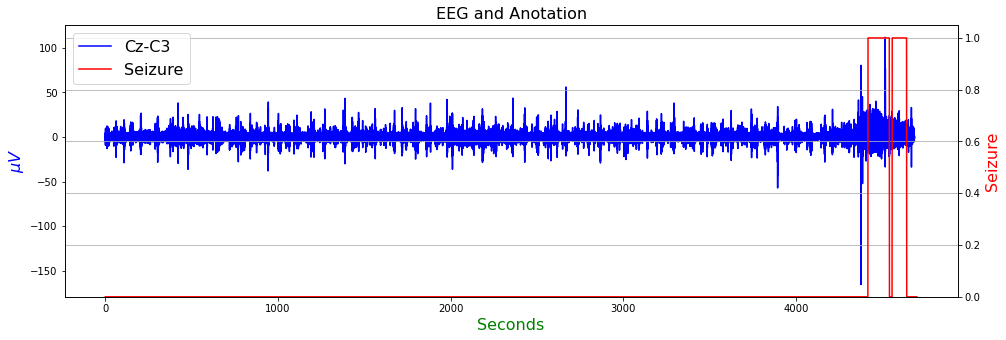

In [8]:
for df,dfl in zip(dataframes,dataframes_labels):
    plot2(df,dfl,'Cz-C3',32, 0, len(eeg1_csv)/32)


It appears eeg1 has 0 values - perhaps sensors were disconnected. Remove this from from data used.

In [9]:
dataframes = [eeg4_csv, eeg5_csv, eeg7_csv, eeg9_csv, eeg13_csv, eeg14_csv, eeg19_csv, 
              eeg21_csv, eeg31_csv, eeg34_csv, eeg36_csv, eeg38_csv, eeg39_csv, eeg44_csv, 
              eeg47_csv, eeg51_csv]
              
dataframes_labels=[channelAnno_4_csv, channelAnno_5_csv, channelAnno_7_csv, channelAnno_9_csv, 
                    channelAnno_13_csv, channelAnno_14_csv, channelAnno_19_csv, channelAnno_21_csv, channelAnno_31_csv, 
                    channelAnno_34_csv, channelAnno_36_csv, channelAnno_38_csv, channelAnno_39_csv, channelAnno_44_csv, 
                    channelAnno_47_csv, channelAnno_51_csv]

In [10]:
eeg_df1 = pd.concat([df for df in dataframes], ignore_index=True)
eeg_labels1 = pd.concat([dfl for dfl in dataframes_labels], ignore_index=True)

In [11]:
len(eeg_df1), len(eeg_labels1)

(2737728, 85792)

In [12]:
eeg_df = pd.melt(eeg_df1)
eeg_df

eeg_labels = pd.melt(eeg_labels1)
eeg_labels

,variable,value
0,F4-C4,0.0
1,F4-C4,0.0
2,F4-C4,0.0
3,F4-C4,0.0
4,F4-C4,0.0
...,...,...
686331,C3-T3,0.0
686332,C3-T3,0.0
686333,C3-T3,0.0
686334,C3-T3,0.0


# Perform Analysis on Cz-C3 channel

# Line Length

In [13]:
def LLcalculation(N, epoch):
    LL = sum(np.absolute(epoch[i+1]-epoch[i]) for i in range(N-1))
    return LL

In [14]:
NEpoch = 256
Noverlap=128
numberofEpochs = (len(eeg_df)-NEpoch)//(NEpoch-Noverlap) + 1 # Use integer divison // to get exact number of epochs
numberofEpochs

171107

In [15]:
featuretime= np.arange(1,numberofEpochs+1,1)*4

In [16]:
len(eeg_df)

21901824

In [17]:
epochstart=0
LL_Feature = np.array([])
for i in range(numberofEpochs):
    Epoch= eeg_df.loc[epochstart:epochstart+NEpoch-1,"value"].to_numpy()
    epochstart += Noverlap
    LL_Feature=np.append(LL_Feature,LLcalculation(NEpoch, Epoch))

In [18]:
len(LL_Feature)

171107

In [19]:
def plot3(eeg_data, eeg_labels, feature,feature_time, feature_name):
    fig,ax = plt.subplots(nrows = 2, ncols = 1, figsize=(16,10))
    recordingtime= np.arange(0,len(eeg_data),1)/32 
    eeg_trace = ax[0].plot(recordingtime, eeg_data,color='blue') # Plot EEG Data
    ax[0].set_ylabel('$\mu V$',color='blue',fontsize=16) 
    ax[0].set_xlabel('Seconds',color='green',fontsize=16) 
    ax2 = ax[0].twinx() # Create a second y axis on the right hand side of the plot using the same x axis.
    features = ax2.plot(feature_time, feature,color='red',label=feature_name) # Plot Annotation data.
    ax2.set_ylabel(feature_name, fontsize=16, color='red') 
    ax2.set_ylim(bottom=0) # Limit the right-hand y axis to start at 0.
    ax2.grid() # Plot a grid for the right hand y axis.
    ax2.legend(eeg_trace + features, ['eeg',feature_name], fontsize=16, loc='best') 
    ax[0].set_title('EEG and '+feature_name,fontsize=16) 

    annotations = ax[1].plot(eeg_labels,color='blue',label='Seizure') # Plot EEG Data
    ax[1].set_ylabel('Seizure',color='blue',fontsize=16) 
    ax[1].set_xlabel('Seconds',color='green',fontsize=16) 
    ax2 = ax[1].twinx() # Create a second y axis on the right hand side of the plot using the same x axis.
    features = ax2.plot(feature_time, feature,color='red',label=feature_name) # Plot Annotation data.
    ax2.set_ylabel(feature_name, fontsize=16, color='red') 
    ax2.set_ylim(bottom=0) # Limit the right-hand y axis to start at 0.
    ax2.grid() # Plot a grid for the right hand y axis.
    ax2.legend(annotations + features, ['Seizure',feature_name], fontsize=16, loc='lower center')

    plt.show()

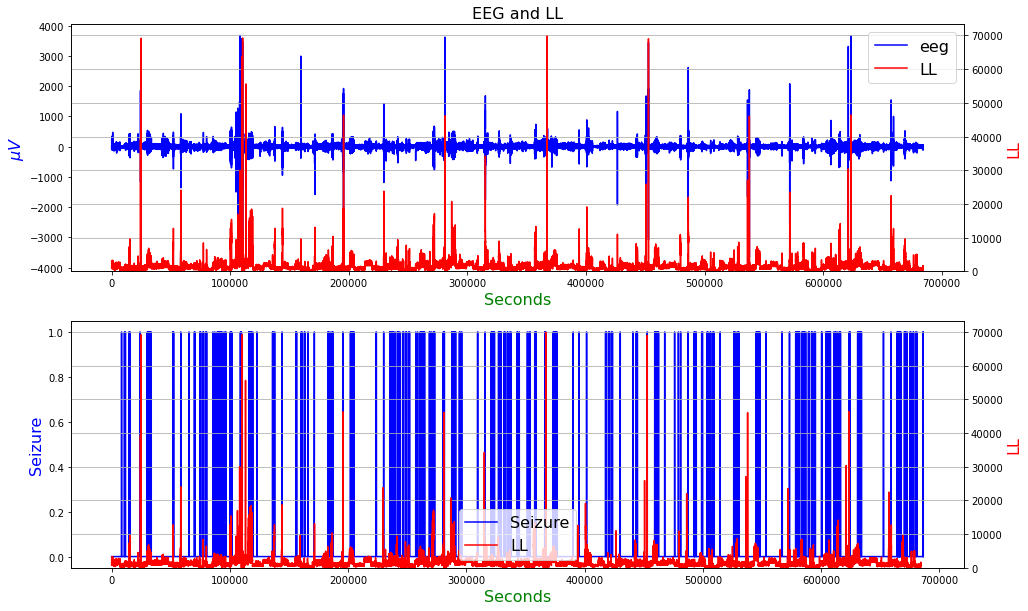

In [20]:
plot3(eeg_df["value"], eeg_labels["value"], LL_Feature,featuretime, "LL")

# Root Mean Squared Amplitude

In [21]:
def RMSAcalculation(N, epoch):
    RMSA = np.sqrt((1/N)*sum((epoch[i])**2 for i in range(N)))
    return RMSA

In [22]:
epochstart=0
RMSA_Feature = np.array([])
for i in range(numberofEpochs):
    Epoch= eeg_df.loc[epochstart:epochstart+NEpoch-1,"value"].to_numpy()
    epochstart += Noverlap
    RMSA_Feature=np.append(RMSA_Feature,RMSAcalculation(NEpoch, Epoch))

In [23]:
len(RMSA_Feature)

171107

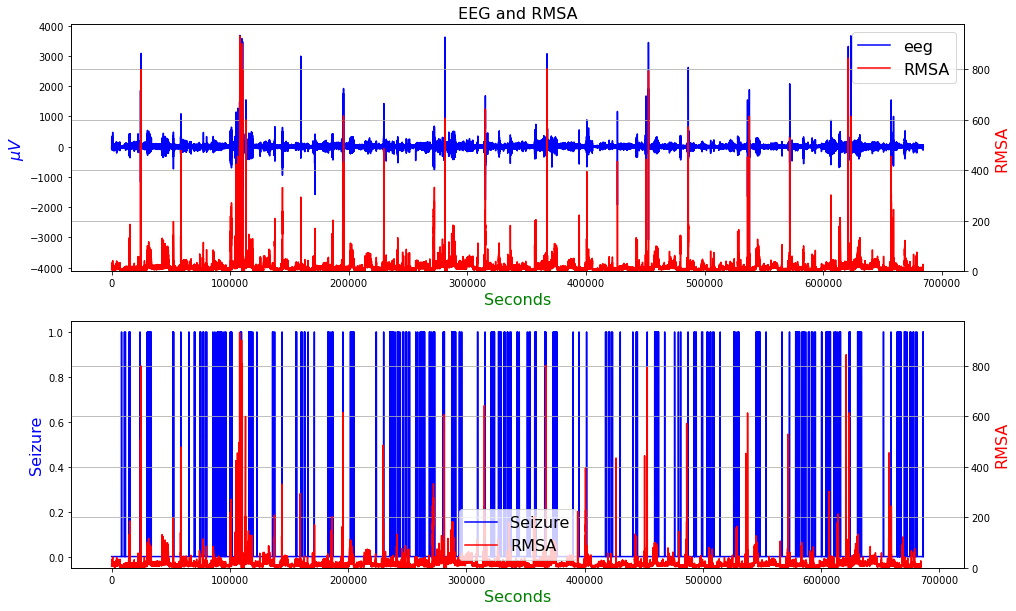

In [24]:
plot3(eeg_df["value"], eeg_labels["value"], RMSA_Feature,featuretime, "RMSA")

# Non Linear Energy

In [25]:
def NLEcalculation(N, epoch):
    NLE = (1/(N-2))*sum(((epoch[i+1])**2 - epoch[i]*epoch[i+2]) for i in range(N-2))
    return NLE

In [26]:
epochstart=0
NLE_Feature = np.array([])
for i in range(numberofEpochs):
    Epoch= eeg_df.loc[epochstart:epochstart+NEpoch-1,"value"].to_numpy()
    epochstart += Noverlap
    NLE_Feature=np.append(NLE_Feature,NLEcalculation(NEpoch, Epoch))

In [27]:
len(NLE_Feature)

171107

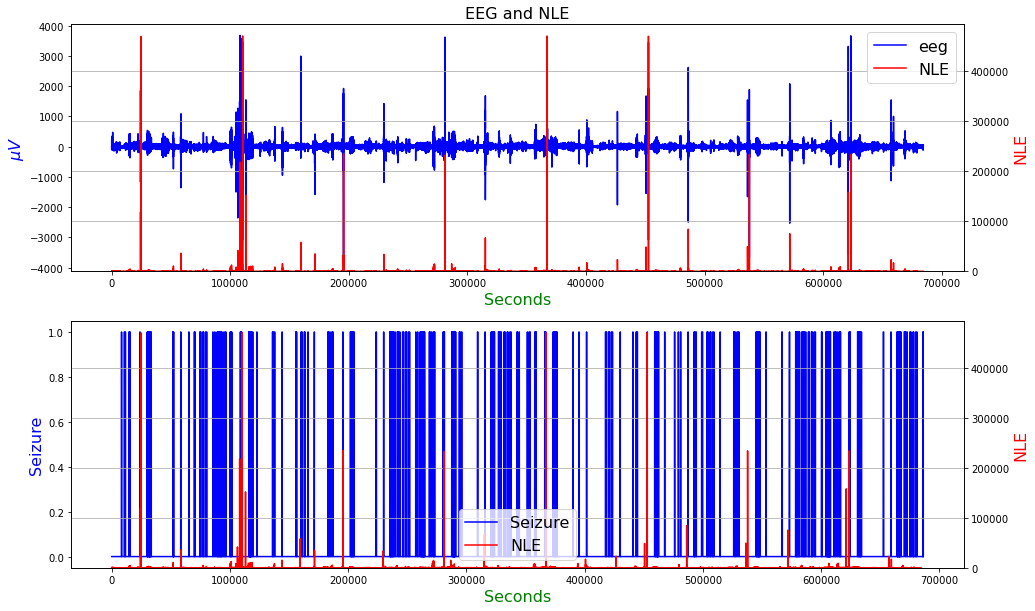

In [28]:
plot3(eeg_df["value"], eeg_labels["value"], NLE_Feature,featuretime, "NLE")

# 1st Hjorth Parameter: Activity

In [29]:
def Meancalculation(N, epoch):
    Mean = (1/N)*sum((epoch[i]) for i in range(N))
    return Mean

In [30]:
def Activitycalculation(N, epoch):
    Mean = Meancalculation(N, epoch)
    Activity = (1/N)*(sum(((epoch[i] - Mean)**2) for i in range(N)))
    return Activity

In [31]:
epochstart=0
Activity_Feature = np.array([])
for i in range(numberofEpochs):
    Epoch= eeg_df.loc[epochstart:epochstart+NEpoch-1,"value"].to_numpy()
    epochstart += Noverlap
    Activity_Feature=np.append(Activity_Feature,Activitycalculation(NEpoch, Epoch))

In [32]:
len(Activity_Feature)

171107

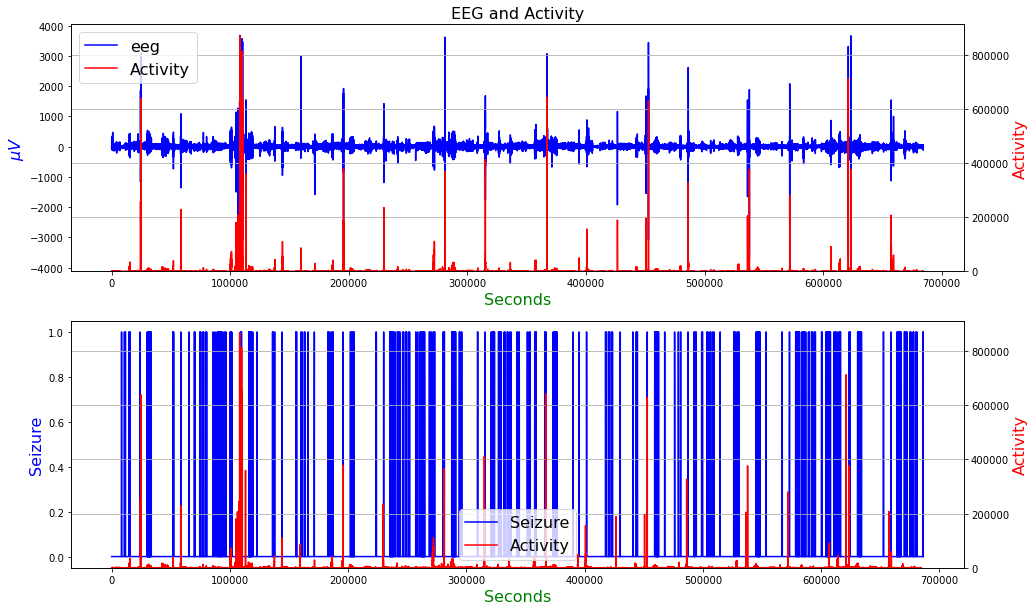

In [33]:
plot3(eeg_df["value"], eeg_labels["value"], Activity_Feature,featuretime, "Activity")

# 2nd Hjorth Parameter: Mobility

In [34]:
def MeanFirstDeriv(N, epoch):
    Mean = (1/(N-1))*sum((epoch[i+1]-epoch[i]) for i in range(N-1))
    return Mean

In [35]:
def VarFirstDeriv(N,epoch):
    Mean = MeanFirstDeriv(N, epoch)
    Var = (1/(N-1))*sum(((epoch[i+1]- epoch[i])- Mean)**2 for i in range(N-1))
    return Var

In [36]:
def Mobilitycalculation(N, epoch):
    Var = VarFirstDeriv(N, epoch)
    Activity = Activitycalculation(N,epoch)
    Mobility = np.sqrt(Var/Activity)
    return Mobility

In [37]:
epochstart=0
Mobility_Feature = np.array([])
for i in range(numberofEpochs):
    Epoch= eeg_df.loc[epochstart:epochstart+NEpoch-1,"value"].to_numpy()
    epochstart += Noverlap
    Mobility_Feature=np.append(Mobility_Feature, Mobilitycalculation(NEpoch, Epoch))

In [38]:
len(Mobility_Feature)

171107

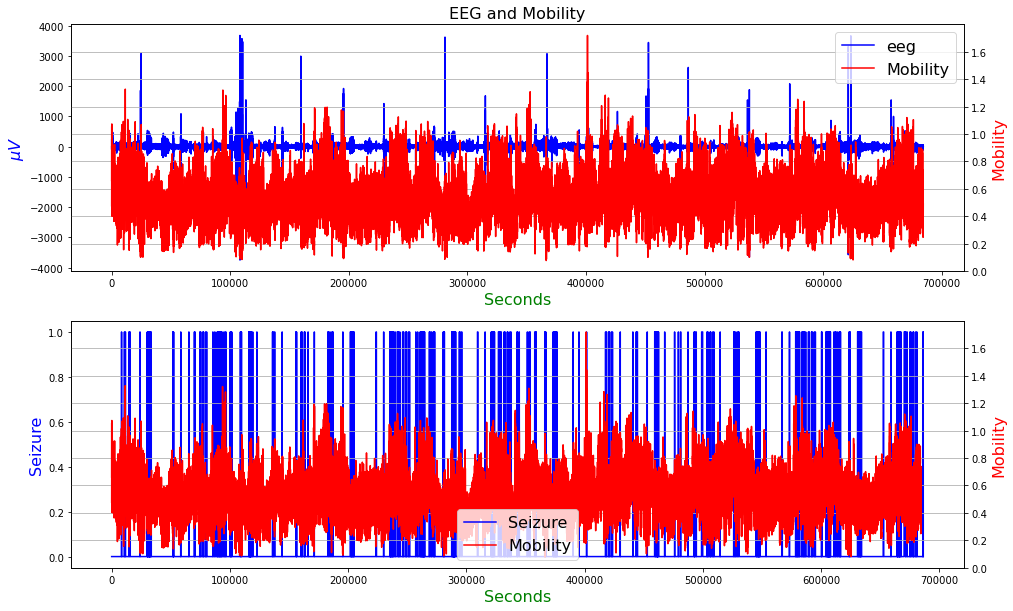

In [39]:
plot3(eeg_df["value"], eeg_labels["value"], Mobility_Feature,featuretime, "Mobility")

# 3rd Hjorth Parameter: Complexity

In [40]:
def MeanSecondDeriv(N, epoch):
    Mean = (1/N-2)*sum(((epoch[i+2] - epoch[i+1])-(epoch[i+1] - epoch[i])) for i in range(N-2))
    return Mean

In [41]:
def VarSecondDeriv(N,epoch):
    Mean = MeanSecondDeriv(N, epoch)
    Var = (1/(N-2))*sum((((epoch[i+2] - epoch[i+1])-(epoch[i+1] - epoch[i]))- Mean)**2 for i in range(N-2))
    return Var

In [42]:
def Complexitycalculation(N, epoch):
    Var = VarSecondDeriv(N, epoch)
    Activity = Activitycalculation(N,epoch)
    Complexity = np.sqrt(Var/Activity)
    return Complexity

In [43]:
epochstart=0
Complexity_Feature = np.array([])
for i in range(numberofEpochs):
    Epoch= eeg_df.loc[epochstart:epochstart+NEpoch-1,"value"].to_numpy()
    epochstart += Noverlap
    Complexity_Feature=np.append(Complexity_Feature, Complexitycalculation(NEpoch, Epoch))

In [44]:
len(Complexity_Feature)

171107

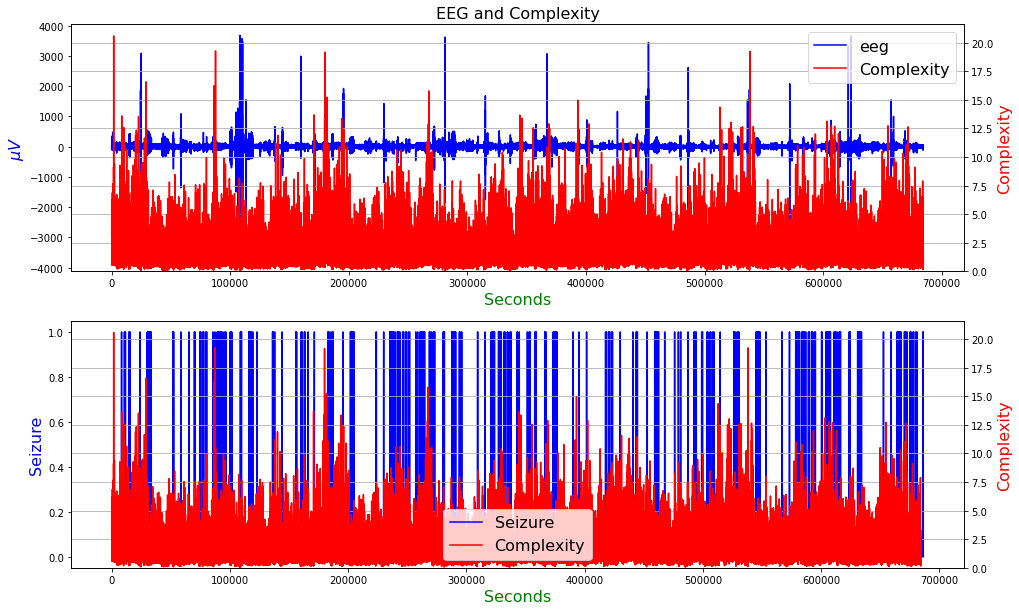

In [45]:
plot3(eeg_df["value"], eeg_labels["value"], Complexity_Feature,featuretime, "Complexity")

# Intensity Weighted Mean Frequency (IWMF)

In [46]:
def fmcalculation(psd, fs, N):
    df = fs/N # fs is the sampling freaquency = 32Hz
    num = df * sum(psd[i]*i for i in range((N//2)-1))
    den = sum(psd[i] for i in range((N//2)-1))
    #print(den)
    return num/den

In [47]:
epochstart=0
FM_Feature = np.array([])
for i in range(numberofEpochs):
    Epoch= eeg_df.loc[epochstart:epochstart+NEpoch-1,"value"].to_numpy()
    PSD = periodogram(Epoch,fs=32,window='hann',detrend=False)[1]
    epochstart += Noverlap
    FM_Feature=np.append(FM_Feature,fmcalculation(PSD, 32, NEpoch))

In [48]:
len(FM_Feature)

171107

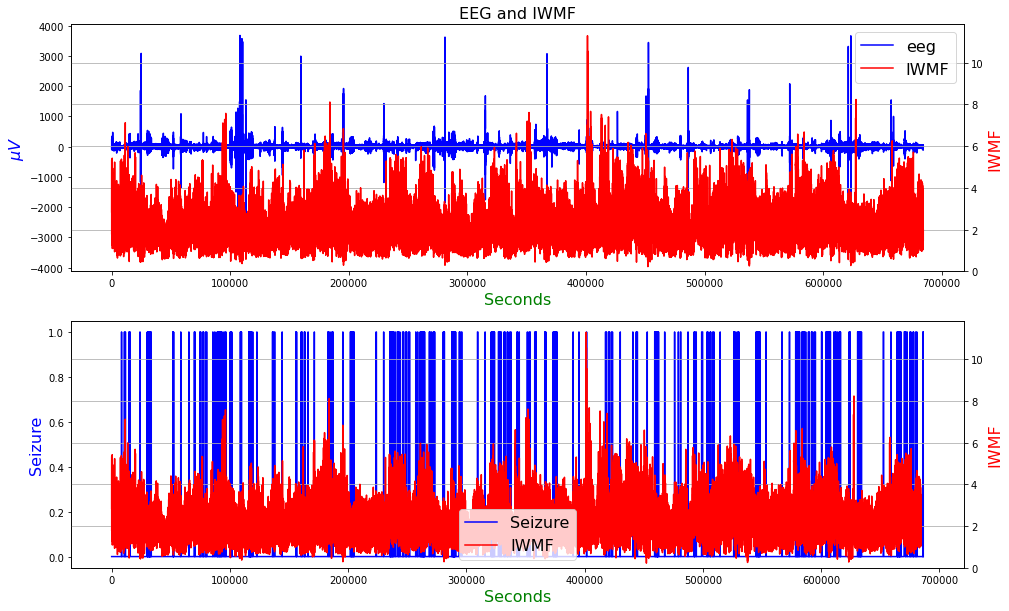

In [49]:
plot3(eeg_df["value"], eeg_labels["value"], FM_Feature,featuretime, "IWMF")

# Intensity Weighted Bandwidth

In [50]:
def bwcalculation(psd, fs, N):
    fm = fmcalculation(psd, fs, N)
    df = fs/N # fs is the sampling freaquency = 32Hz   
    num = sum(psd[i]*((fm - i*df)**2) for i in range((N//2)-1))
    den = sum(psd[i] for i in range((N//2)-1))
    return np.sqrt(num/den)

In [51]:
epochstart=0
BW_Feature = np.array([])
for i in range(numberofEpochs):
    Epoch= eeg_df.loc[epochstart:epochstart+NEpoch-1,"value"].to_numpy()
    PSD = periodogram(Epoch,fs=32,window='hann',detrend=False)[1]
    epochstart += Noverlap
    BW_Feature=np.append(BW_Feature,bwcalculation(PSD, 32, NEpoch))

In [52]:
len(BW_Feature)

171107

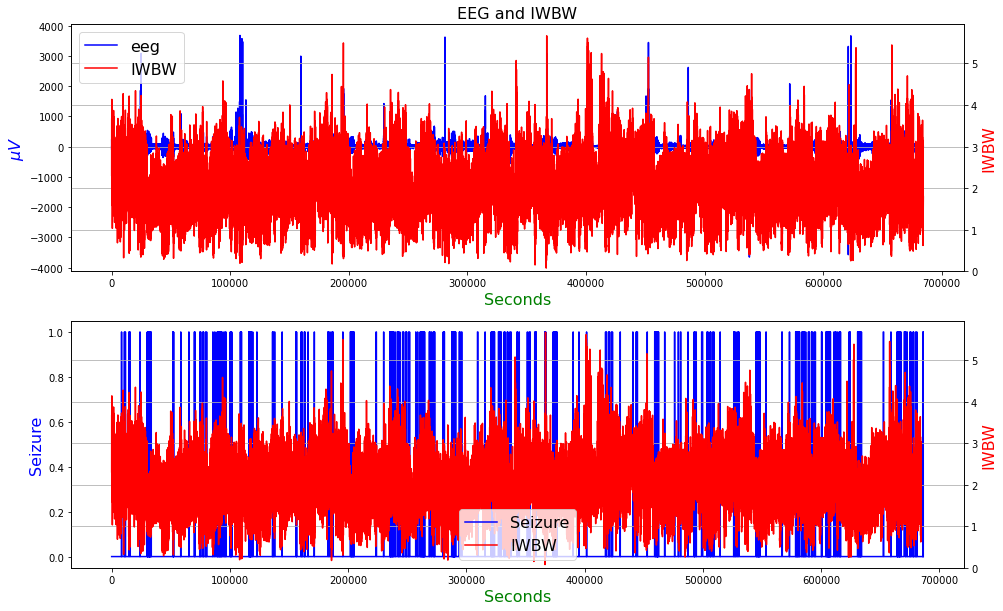

In [53]:
plot3(eeg_df["value"], eeg_labels["value"], BW_Feature,featuretime, "IWBW")

# Total Power

In [54]:
def tpcalculation(psd, N):
    tp = sum(psd[i] for i in range((N//2)-1))
    return tp

In [55]:
epochstart=0
TP_Feature = np.array([])
for i in range(numberofEpochs):
    Epoch= eeg_df.loc[epochstart:epochstart+NEpoch-1,"value"].to_numpy()
    PSD = periodogram(Epoch,fs=32,window='hann',detrend=False)[1]
    epochstart += Noverlap
    TP_Feature=np.append(TP_Feature,tpcalculation(PSD,  NEpoch))

In [56]:
len(TP_Feature)

171107

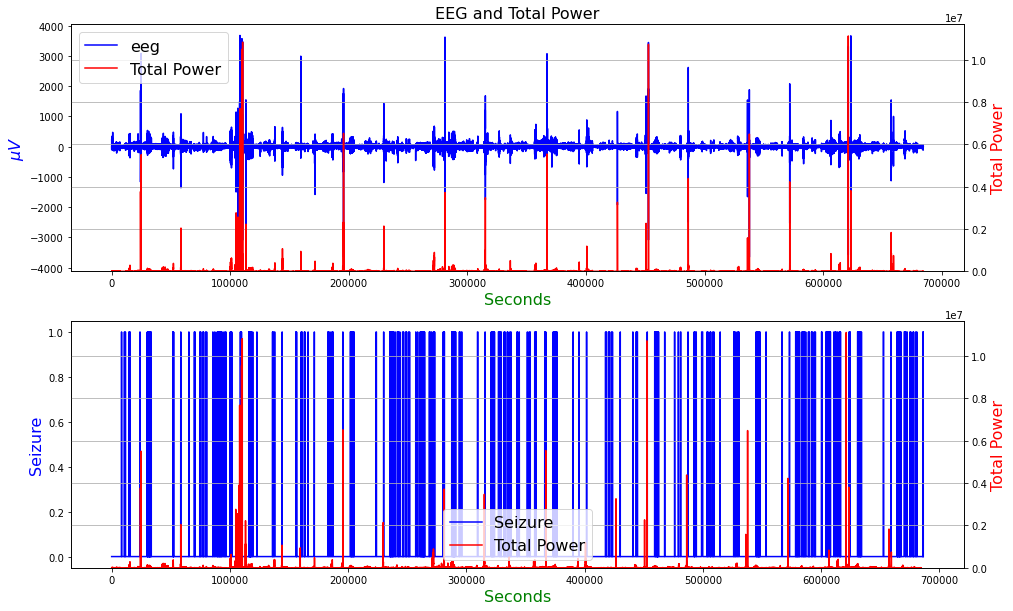

In [57]:
plot3(eeg_df["value"], eeg_labels["value"], TP_Feature,featuretime, "Total Power")

# Peak Frequency

In [58]:
def pfcalculation(psd, fs, N):
    k=0
    max = psd[0]
    for i in range(1,128):
        if (psd[i] > max):
            k = i
            max = psd[i]
    return k * (fs/N)

In [59]:
epochstart=0
PF_Feature = np.array([])
for i in range(numberofEpochs):
    Epoch= eeg_df.loc[epochstart:epochstart+NEpoch-1,"value"].to_numpy()
    PSD = periodogram(Epoch,fs=32,window='hann',detrend=False)[1]
    epochstart += Noverlap
    PF_Feature=np.append(PF_Feature,pfcalculation(PSD, 32, NEpoch))

In [60]:
len(PF_Feature)

171107

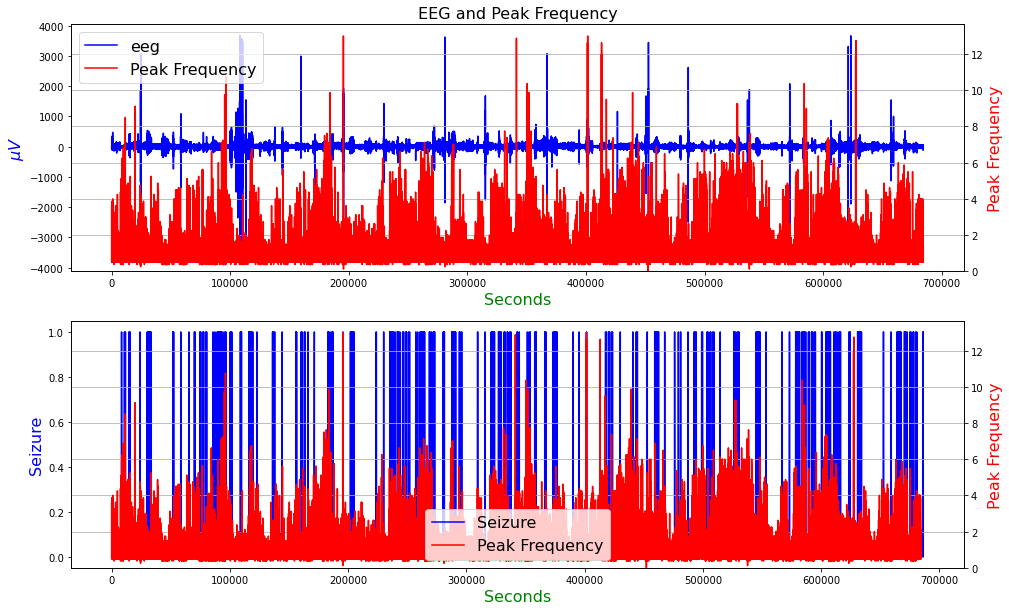

In [61]:
plot3(eeg_df["value"], eeg_labels["value"], PF_Feature,featuretime, "Peak Frequency")

# Spectral Edge Frequency 85

In [62]:
def SEF85calculation(psd, fs, N):
    tp = tpcalculation(psd, N)
    sef85 = 0
    i = 0
    while(sef85< 0.85*tp):
        sef85+= psd[i]
        i+=1
    sef85 = (i-1)*(fs/N)
    return sef85

In [63]:
epochstart=0
SEF85_Feature = np.array([])
for i in range(numberofEpochs):
    Epoch= eeg_df.loc[epochstart:epochstart+NEpoch-1,"value"].to_numpy()
    PSD = periodogram(Epoch,fs=32,window='hann',detrend=False)[1]
    epochstart += Noverlap
    SEF85_Feature=np.append(SEF85_Feature,SEF85calculation(PSD, 32, NEpoch))

In [64]:
len(SEF85_Feature)

171107

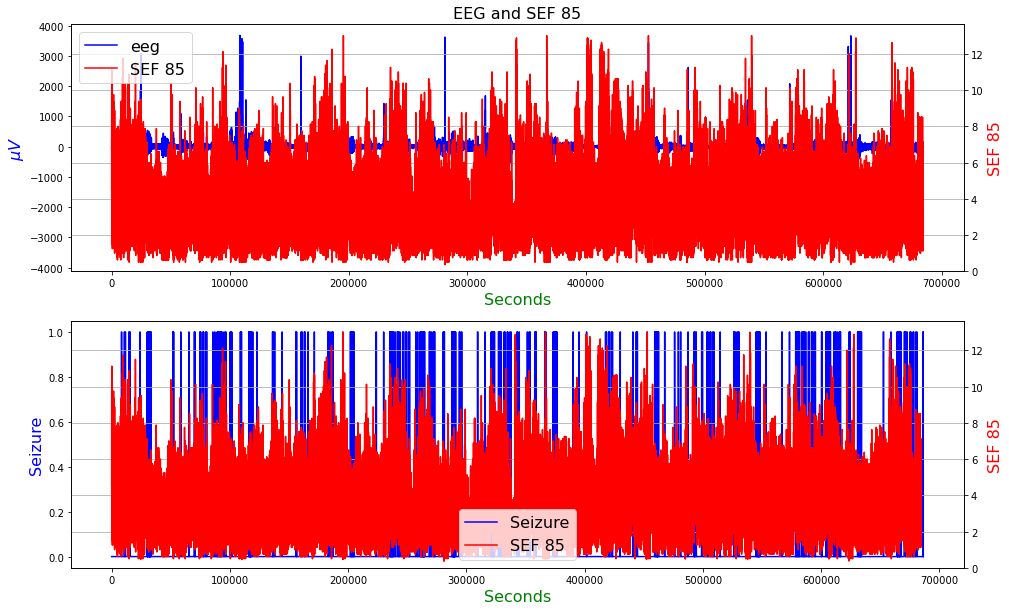

In [65]:
plot3(eeg_df["value"], eeg_labels["value"], SEF85_Feature,featuretime, "SEF 85")

# Spectral Edge Frequency 90

In [66]:
def SEF90calculation(psd, fs, N):
    tp = tpcalculation(psd, N)
    sef90 = 0
    i = 0
    while(sef90< 0.9*tp):
        sef90+= psd[i]
        i+=1
    sef90 = (i-1)*(fs/N)
    return sef90

In [67]:
epochstart=0
SEF90_Feature = np.array([])
for i in range(numberofEpochs):
    Epoch= eeg_df.loc[epochstart:epochstart+NEpoch-1,"value"].to_numpy()
    PSD = periodogram(Epoch,fs=32,window='hann',detrend=False)[1]
    epochstart += Noverlap
    SEF90_Feature=np.append(SEF90_Feature,SEF90calculation(PSD, 32, NEpoch))

In [68]:
len(SEF90_Feature)

171107

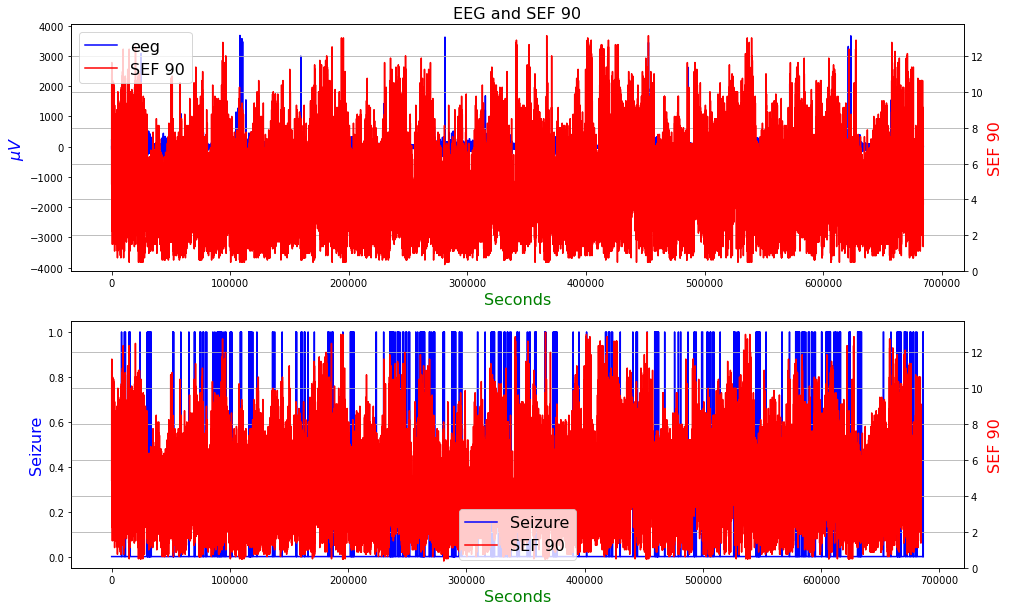

In [69]:
plot3(eeg_df["value"], eeg_labels["value"], SEF90_Feature,featuretime, "SEF 90")

# Spectral Edge Frequency 95

In [70]:
def SEF95calculation(psd, fs, N):
    tp = tpcalculation(psd, N)
    sef95 = 0
    i = 0
    while(sef95< 0.95*tp):
        sef95+= psd[i]
        i+=1
    sef95 = (i-1)*(fs/N)
    return sef95

In [71]:
epochstart=0
SEF95_Feature = np.array([])
for i in range(numberofEpochs):
    Epoch= eeg_df.loc[epochstart:epochstart+NEpoch-1,"value"].to_numpy()
    PSD = periodogram(Epoch,fs=32,window='hann',detrend=False)[1]
    epochstart += Noverlap
    SEF95_Feature=np.append(SEF95_Feature,SEF95calculation(PSD, 32, NEpoch))

In [72]:
len(SEF95_Feature)

171107

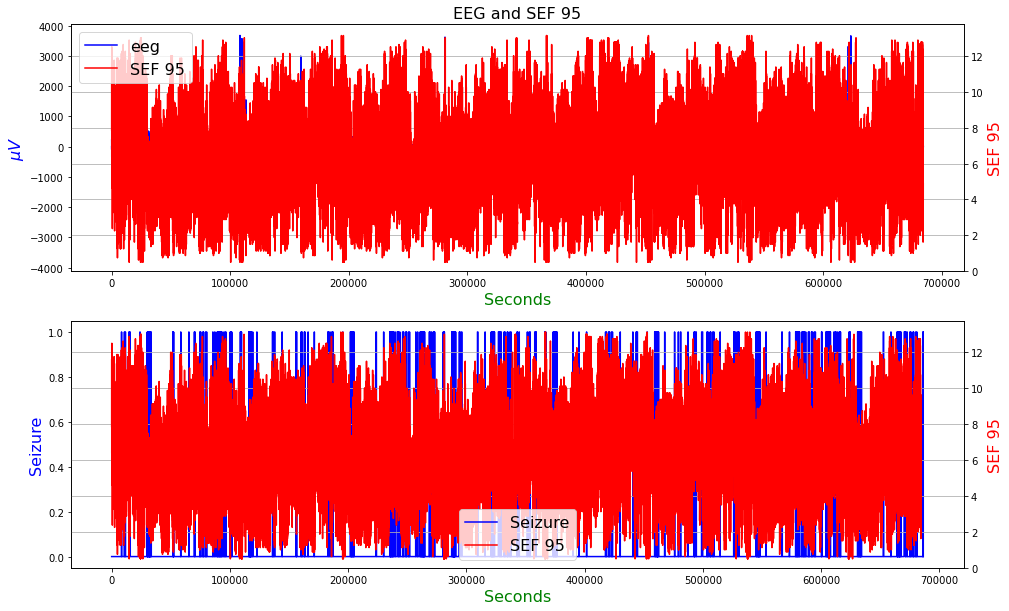

In [73]:
plot3(eeg_df["value"], eeg_labels["value"], SEF95_Feature,featuretime, "SEF 95")

# Power in Specific Bands

In [74]:
def bandpowercalculation(psd, N, freq_band):
    band_power = sum(psd[i] for i in range((N//2)-1) if freq_band[0] <= i < freq_band[1])
    return band_power


In [75]:
epochstart=0
band02_Feature=band13_Feature=band24_Feature =band35_Feature =band46_Feature =band57_Feature =band68_Feature =band79_Feature =band810_Feature =band911_Feature =band1012_Feature =band1113_Feature = np.array([])
for i in range(numberofEpochs):
    Epoch= eeg_df.loc[epochstart:epochstart+NEpoch-1,"value"].to_numpy()
    PSD = periodogram(Epoch,fs=32,window='hann',detrend=False)[1]
    epochstart += Noverlap
    band02_Feature=np.append(band02_Feature,bandpowercalculation(PSD, 32, ([0,2])))
    band13_Feature=np.append(band13_Feature,bandpowercalculation(PSD, 32, ([1,3])))
    band24_Feature=np.append(band24_Feature,bandpowercalculation(PSD, 32, ([2,4])))
    band35_Feature=np.append(band35_Feature,bandpowercalculation(PSD, 32, ([3,5])))
    band46_Feature=np.append(band46_Feature,bandpowercalculation(PSD, 32, ([4,6])))
    band57_Feature=np.append(band57_Feature,bandpowercalculation(PSD, 32, ([5,7])))
    band68_Feature=np.append(band68_Feature,bandpowercalculation(PSD, 32, ([6,8])))
    band79_Feature=np.append(band79_Feature,bandpowercalculation(PSD, 32, ([7,9])))
    band810_Feature=np.append(band810_Feature,bandpowercalculation(PSD, 32, ([8,10])))
    band911_Feature=np.append(band911_Feature,bandpowercalculation(PSD, 32, ([9,11])))
    band1012_Feature=np.append(band1012_Feature,bandpowercalculation(PSD, 32, ([10,12])))
    band1113_Feature=np.append(band1113_Feature,bandpowercalculation(PSD, 32, ([11,13])))

In [76]:
len(band02_Feature)

171107

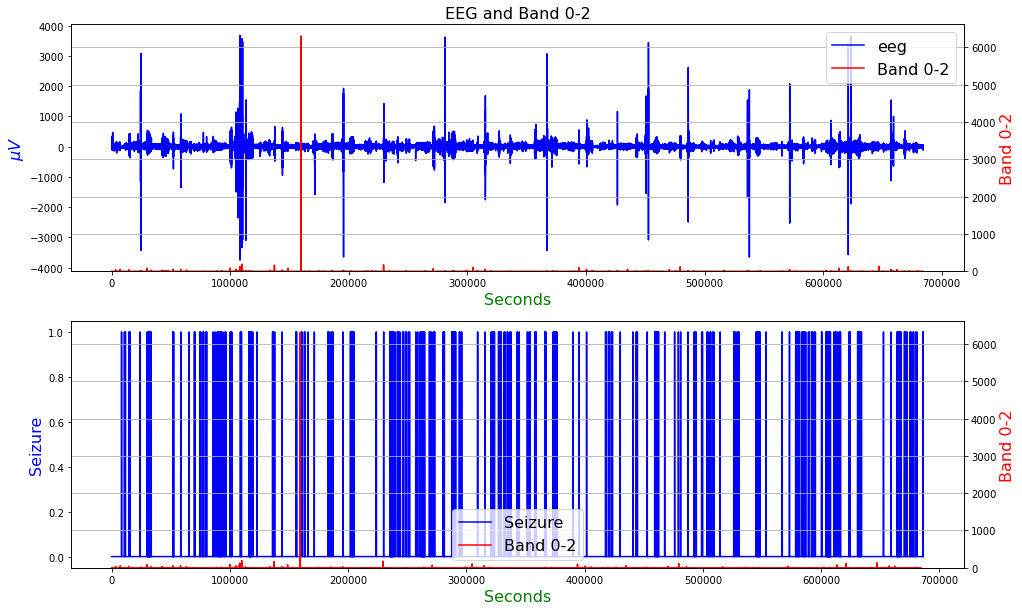

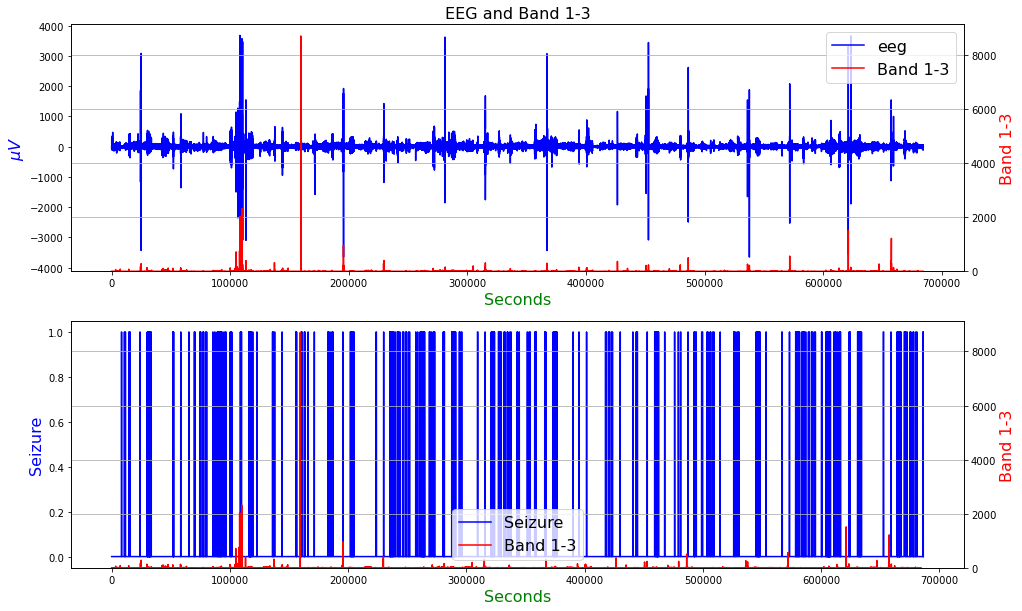

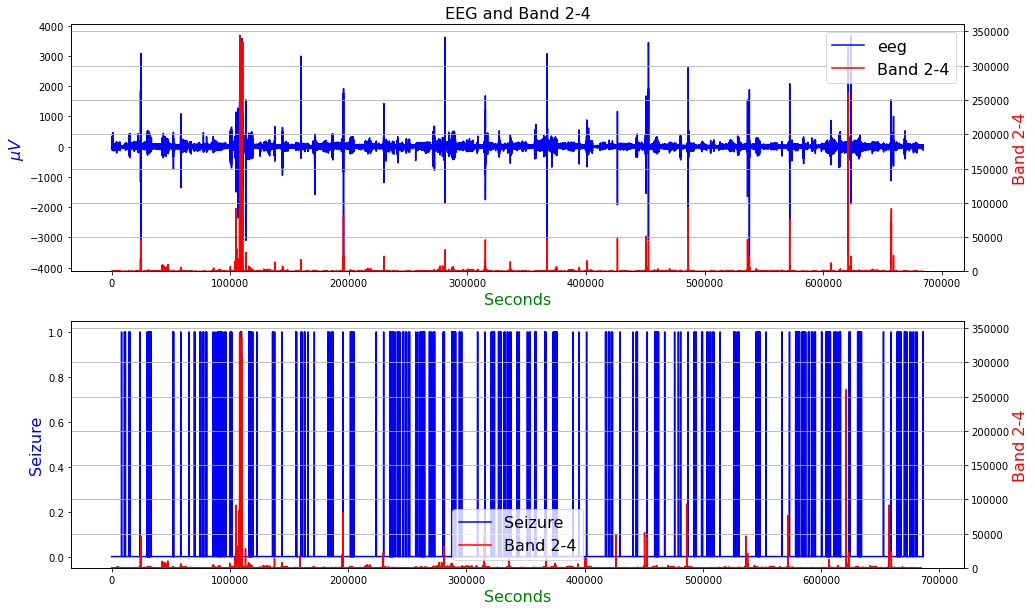

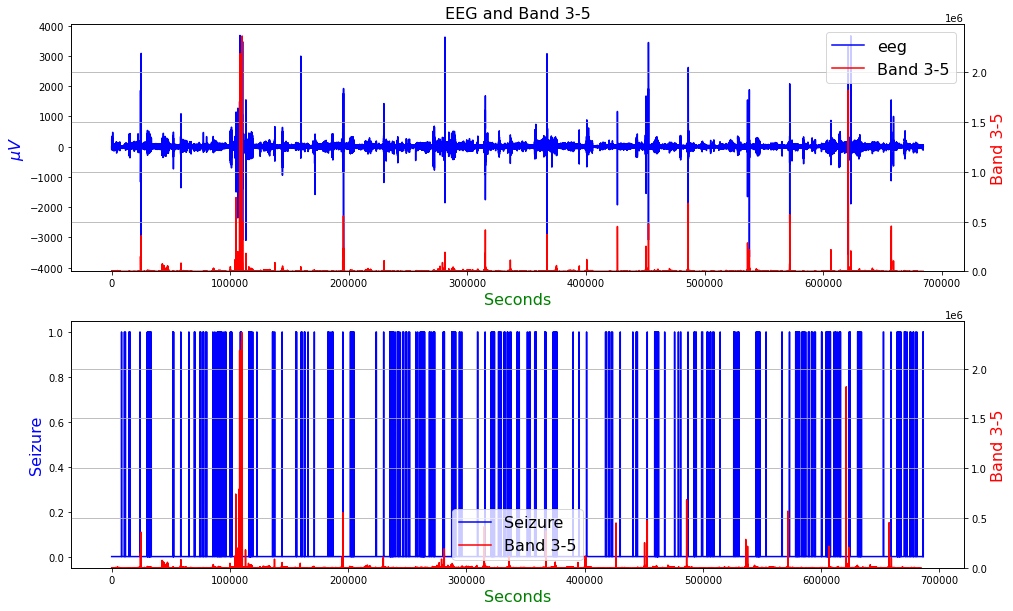

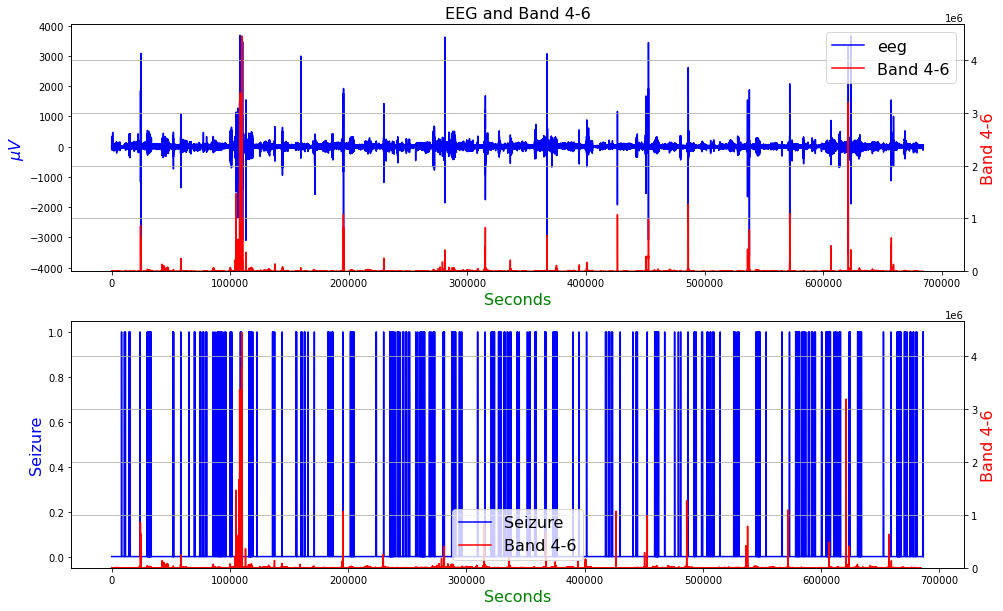

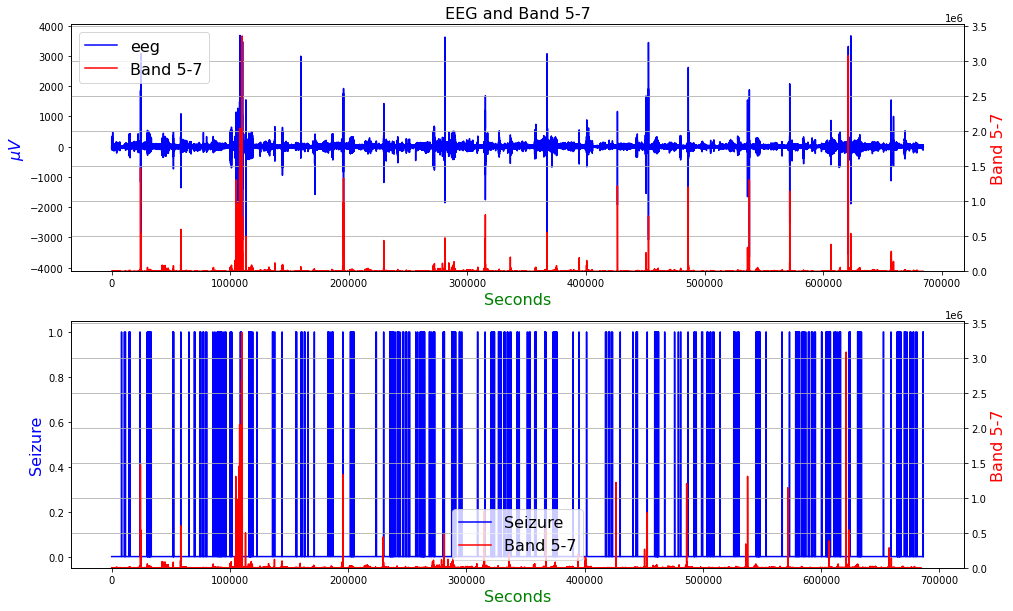

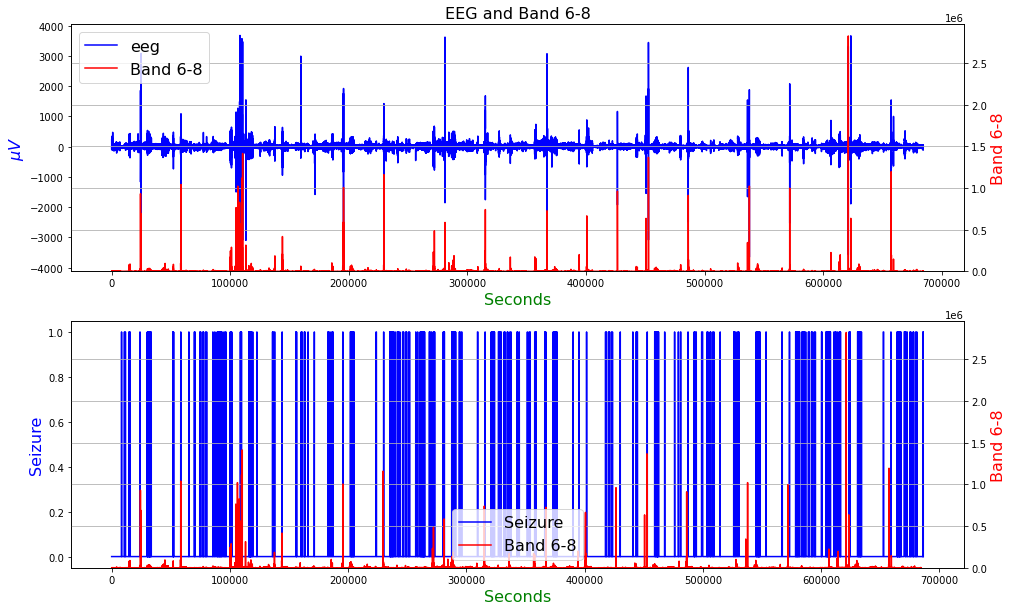

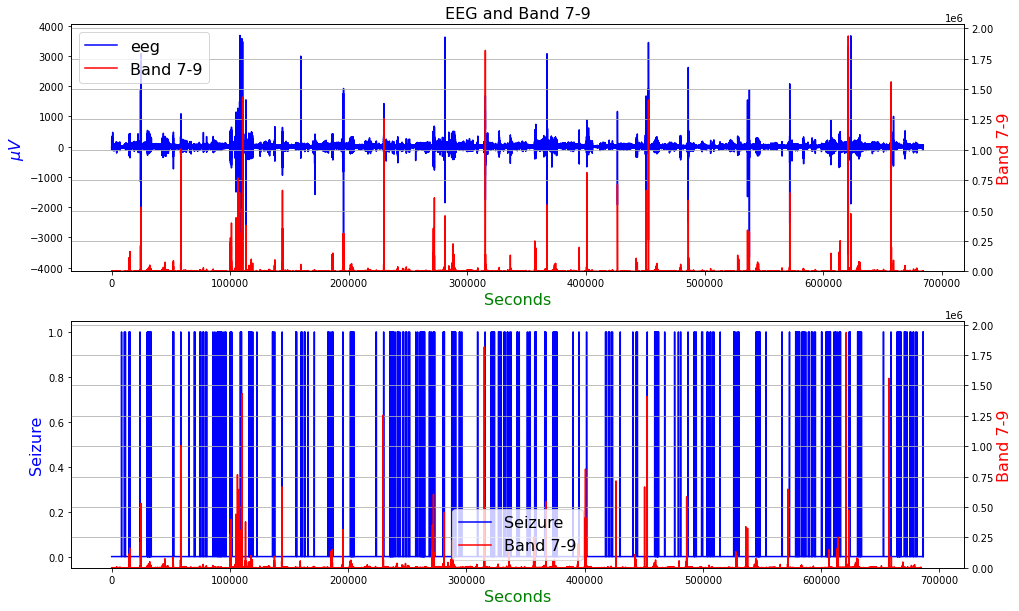

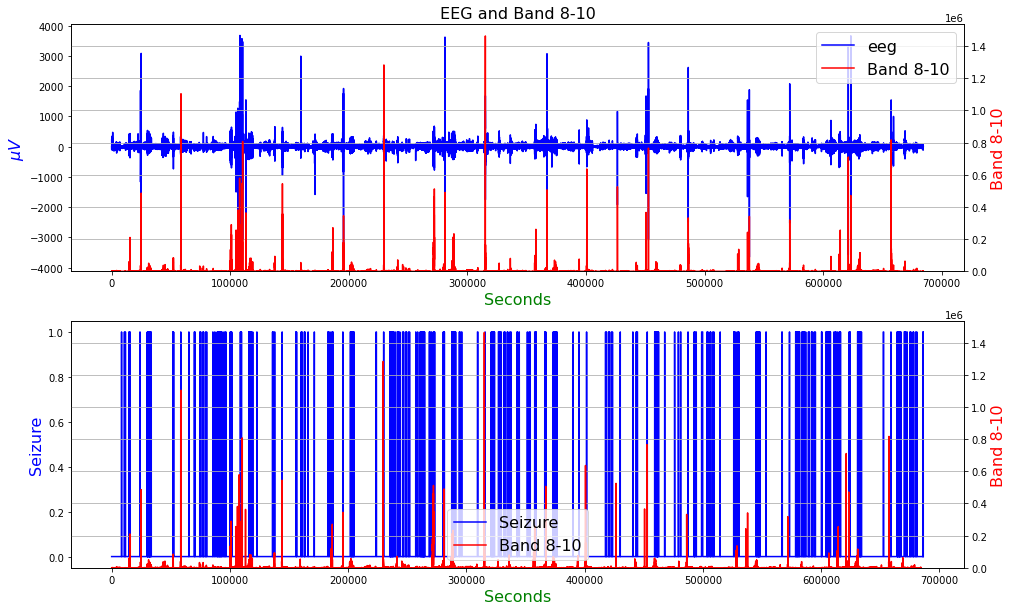

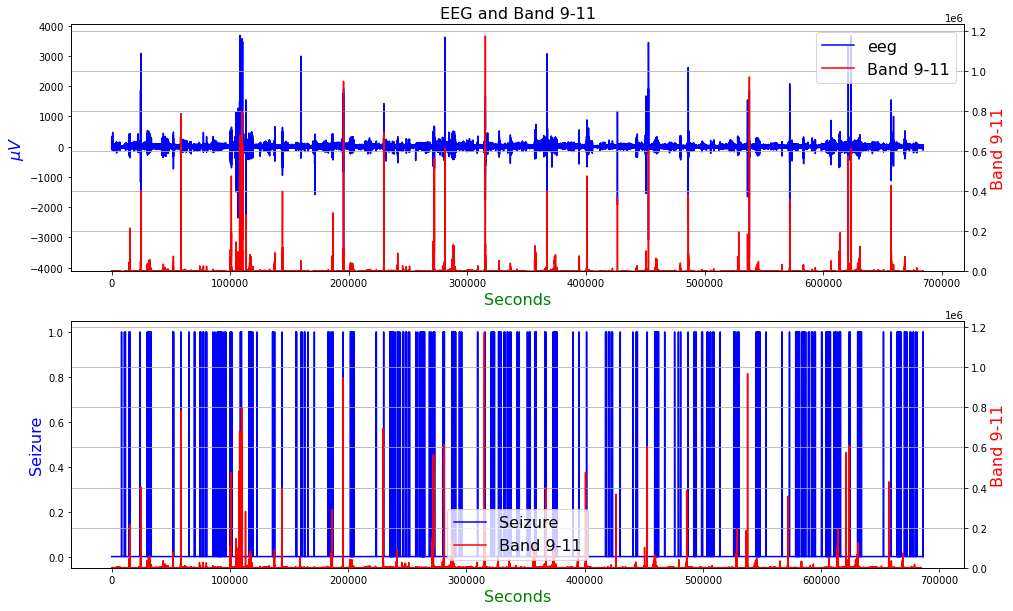

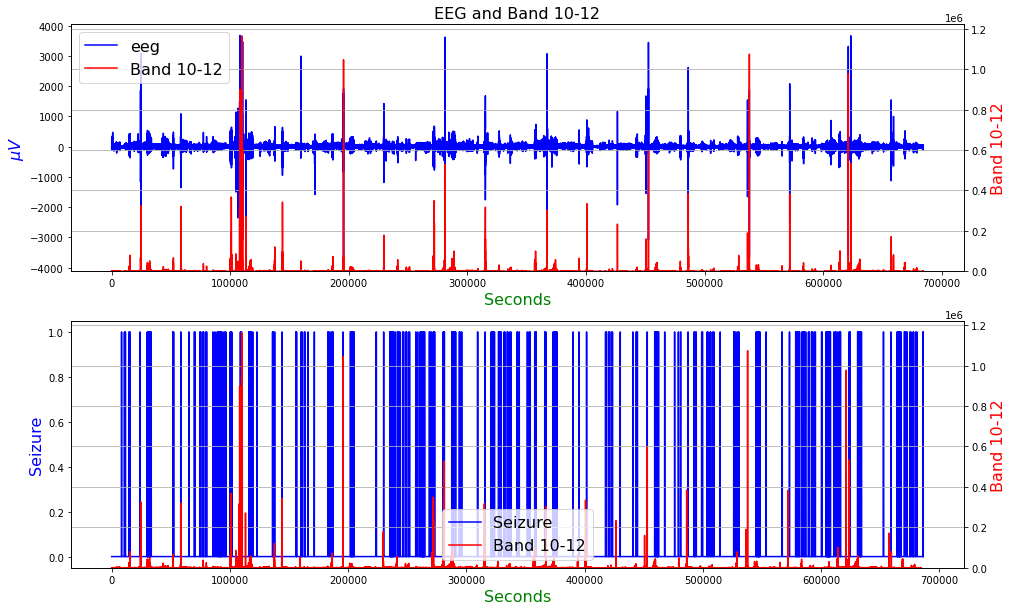

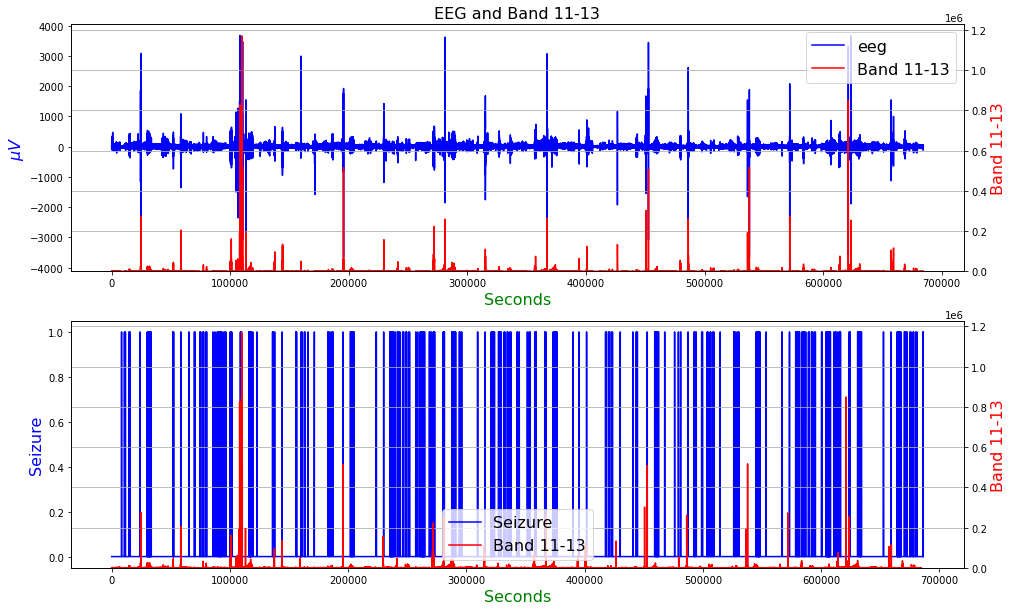

In [77]:
plot3(eeg_df["value"], eeg_labels["value"], band02_Feature,featuretime, "Band 0-2")
plot3(eeg_df["value"], eeg_labels["value"], band13_Feature,featuretime, "Band 1-3")
plot3(eeg_df["value"], eeg_labels["value"], band24_Feature,featuretime, "Band 2-4")
plot3(eeg_df["value"], eeg_labels["value"], band35_Feature,featuretime, "Band 3-5")
plot3(eeg_df["value"], eeg_labels["value"], band46_Feature,featuretime, "Band 4-6")
plot3(eeg_df["value"], eeg_labels["value"], band57_Feature,featuretime, "Band 5-7")
plot3(eeg_df["value"], eeg_labels["value"], band68_Feature,featuretime, "Band 6-8")
plot3(eeg_df["value"], eeg_labels["value"], band79_Feature,featuretime, "Band 7-9")
plot3(eeg_df["value"], eeg_labels["value"], band810_Feature,featuretime, "Band 8-10")
plot3(eeg_df["value"], eeg_labels["value"], band911_Feature,featuretime, "Band 9-11")
plot3(eeg_df["value"], eeg_labels["value"], band1012_Feature,featuretime, "Band 10-12")
plot3(eeg_df["value"], eeg_labels["value"], band1113_Feature,featuretime, "Band 11-13")

# Model Creation

In [78]:
features = np.column_stack((LL_Feature, RMSA_Feature,NLE_Feature,
                            Activity_Feature, Mobility_Feature, Complexity_Feature,
                            FM_Feature,BW_Feature, TP_Feature, PF_Feature, SEF90_Feature,
                           SEF85_Feature,SEF95_Feature,
                           band02_Feature, band13_Feature, band24_Feature, band35_Feature, band46_Feature, 
                            band57_Feature, band68_Feature, band79_Feature, band810_Feature, band911_Feature,
                            band1012_Feature, band1113_Feature))

In [79]:
np.shape(features)

(171107, 25)

In [80]:
CzC3_labels = eeg_labels.loc[:,"value"][featuretime].to_numpy()

In [81]:
len(CzC3_labels)

171107

In [82]:
X_train, X_test, y_train, y_test = train_test_split(features, CzC3_labels, test_size=0.1, random_state=1) 


In [83]:
np.shape(X_train), np.shape(X_test), len(y_train), len(y_test)

((153996, 25), (17111, 25), 153996, 17111)

In [84]:
len(np.where(y_train ==0)[0]), len(np.where(y_train ==1)[0])

(145395, 8601)

Clearly there is a class imbalance in the training data. The vast majority of the epochs are in the non seizure class. This could lead to a biased model.
Perform undersampling to make both classes have equal samples

In [85]:
from imblearn.under_sampling import RandomUnderSampler

# Create the undersampler object
undersampler = RandomUnderSampler(random_state=42)

# Fit and transform the training data
X_train_resampled, y_train_resampled = undersampler.fit_resample(X_train, y_train)

In [86]:
len(X_train_resampled), len(y_train_resampled)

(17202, 17202)

In [87]:
len(np.where(y_train_resampled ==0)[0]), len(np.where(y_train_resampled ==1)[0])

(8601, 8601)

# RF on Resampled data

In [88]:
param_grid = {
    'n_estimators': [50,100,150],
    'max_depth': range(4,12) 
}

rf = RandomForestClassifier(random_state=1)

# Use grid search cross-validation to find the best hyperparameters
grid_search_2 = GridSearchCV(rf,param_grid, cv=5, scoring= "roc_auc")
grid_search_2.fit(X_train_resampled, y_train_resampled)

# Print the best hyperparameters and the corresponding accuracy
print("Best hyperparameters: ", grid_search_2.best_params_)
print("Best accuracy: {:.2f}".format(grid_search_2.best_score_))

Best hyperparameters:  {'max_depth': 11, 'n_estimators': 150}
Best accuracy: 0.72


In [89]:
# Initialize a new instance of RandomForestClassifier with the best hyperparameters
best_n_estimators = grid_search_2.best_params_['n_estimators']
best_max_depth = grid_search_2.best_params_['max_depth']
rf1_best = RandomForestClassifier(n_estimators=best_n_estimators, max_depth=best_max_depth,random_state=1)

# Fit the model on the training data
rf1_best.fit(X_train_resampled, y_train_resampled)


RandomForestClassifier(max_depth=11, n_estimators=150, random_state=1)

In [90]:
def ConfusionMatrixMetrics(y_test, pred):
    table = confusion_matrix(y_true = y_test,y_pred = pred)
    disp = ConfusionMatrixDisplay(confusion_matrix=table)
    disp.plot()
    
    # Extract values from the confusion matrix
    tn, fp, fn, tp = table.ravel()

    # Calculate metrics
    accuracy = (tp+tn)/(tn+fp+fn+tp)
    sensitivity = tp / (tp+fn)
    specificity = tn / (tn+fp)
    precision = tp/(tp+fp)
    f1 = 2 * (precision * sensitivity) / (precision + sensitivity)

    print("Accuracy: {:.4f}".format(accuracy))
    print("Sensitivity/ Recall: {:.4f}".format(sensitivity))
    print("Specificity: {:.4f}".format(specificity))
    print("Precision: {:.4f}".format(precision))
    print("F1 score: {:.4f}".format(f1))

Accuracy: 0.7694
Sensitivity/ Recall: 0.6757
Specificity: 0.8632
Precision: 0.8316
F1 score: 0.7456


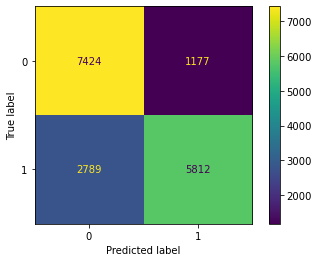

In [91]:
pred_test = rf1_best.predict(X_train_resampled)
ConfusionMatrixMetrics(y_train_resampled, pred_test)

In [92]:
rf1_pred = rf1_best.predict(X_test )

Accuracy: 0.7268
Sensitivity/ Recall: 0.5531
Specificity: 0.7380
Precision: 0.1198
F1 score: 0.1969


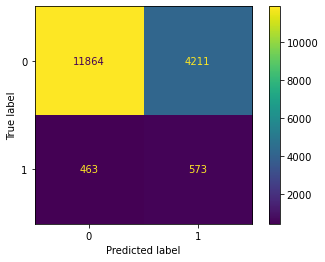

In [93]:
ConfusionMatrixMetrics(y_test, rf1_pred)

In [94]:
#Define function to plot ROC curve
def PlotRocCurve(y_test, pred_prob):
    # calculate fpr, tpr, thresholds and auc
    fpr, tpr, thresholds = roc_curve(y_test, pred_prob[:,1])
    roc_auc = auc(fpr, tpr)

    # plot ROC curve
    plt.plot(fpr, tpr, color='darkorange', lw=2, label='ROC curve (area = %0.2f)' % roc_auc)
    plt.plot([0, 1], [0, 1], color='navy', lw=2, linestyle='--')
    plt.xlim([0.0, 1.0])
    plt.ylim([0.0, 1.05])
    plt.xlabel('False Positive Rate')
    plt.ylabel('True Positive Rate')
    plt.title('Receiver operating characteristic example')
    plt.legend(loc="lower right")
    plt.show()  

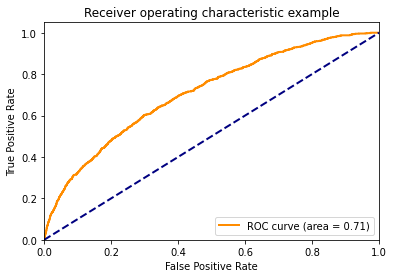

In [95]:
rf1_pred_prob = rf1_best.predict_proba(X_test)
PlotRocCurve(y_test,rf1_pred_prob)

In [96]:
#Make feature importance plotter:
def PlotFeatureImportance(feature_importance, feature_names):
    # Sort feature importance values in descending order
    sorted_idx = feature_importance.argsort()

    # Reorder feature names according to sorted feature importance values
    sorted_feature_names = [feature_names[i] for i in sorted_idx]

    # Set color palette
    colors = sns.color_palette("viridis", len(feature_importance))

    # Create horizontal bar plot of feature importances
    fig, ax = plt.subplots(figsize=(10,8))
    ax.barh(range(len(feature_importance)), feature_importance[sorted_idx], color=colors)
    ax.set_yticks(range(len(feature_importance)))
    ax.set_yticklabels(sorted_feature_names)
    ax.set_xlabel('Feature Importance')
    ax.set_ylabel('Feature Name')
    ax.set_title('Feature Importance')
    plt.show()

In [97]:
#Find feature importance
rf1_feature_importance = rf1_best.feature_importances_
# Define feature names
feature_names = ['Line Length', 'RMSA', 'Non Linear Energy', 
                 'Activity', 'Mobility', 'Complexity', 
                 'IWMF', 'IWBW', 'Total Power', 'Peak Frequency','SEF 90', 'SEF85','SEF95', 
                 'band02', 'band13', 'band24', 'band35', 'band46', 'band57', 'band68', 'band79', 
                 'band810', 'band911', 'band1012', 'band1113']

In [98]:
rf1_feature_importance

array([0.09835202, 0.05826776, 0.12058103, 0.05732137, 0.05429318,
       0.02469305, 0.04519518, 0.03769056, 0.0374765 , 0.01264513,
       0.02667596, 0.03620886, 0.02542856, 0.02956408, 0.03209468,
       0.02566041, 0.02851971, 0.0274954 , 0.03195431, 0.0260174 ,
       0.0313759 , 0.03220407, 0.02720303, 0.03420426, 0.03887758])

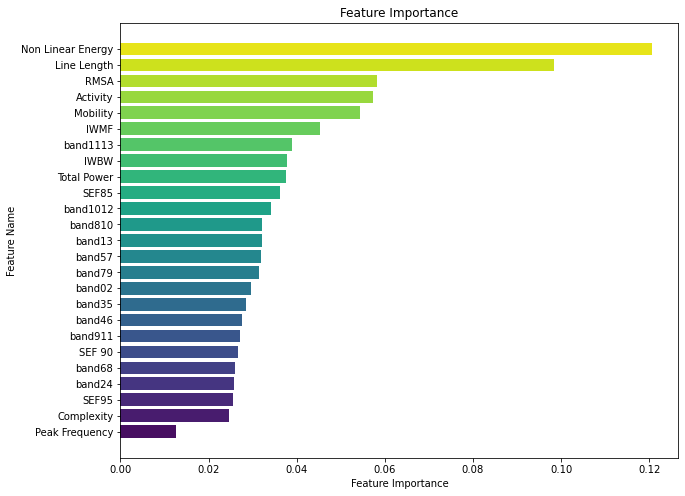

In [99]:
PlotFeatureImportance(rf1_feature_importance, feature_names)

# Rebuild RF model with most importance features

In [100]:
important_features = np.column_stack((LL_Feature, NLE_Feature, Activity_Feature, RMSA_Feature,TP_Feature, band1012_Feature,
                                        band79_Feature, band911_Feature, band1113_Feature, band810_Feature,
                                       FM_Feature, Mobility_Feature, SEF90_Feature))

important_feature_names = ['Line Length', 'Non Linear Energy','Activity', 'RMSA','Total Power', 'band 10-12', 'band 7-9',
                            'band 9-11', 'band 11-13', 'band 8-10','IWMF','Mobility', 'SEF90']

np.shape(important_features)

(171107, 13)

In [101]:
X_train_2, X_test_2, y_train_2, y_test_2 = train_test_split(important_features, CzC3_labels, test_size=0.1, random_state=1) 


In [102]:
# Fit and transform the training data
X_train_2_resampled, y_train_2_resampled = undersampler.fit_resample(X_train_2, y_train_2)


len(X_train_2_resampled), len(y_train_2_resampled), np.shape(X_train_2_resampled)

(17202, 17202, (17202, 13))

# RF on Resampled data with Important Predictors

In [103]:
param_grid = {
    'n_estimators': [50,100,150],
    'max_depth': range(4,12)
}

rf = RandomForestClassifier(random_state=1)

# Use grid search cross-validation to find the best hyperparameters
grid_search_2 = GridSearchCV(rf,param_grid, cv=5, scoring="roc_auc")
grid_search_2.fit(X_train_2_resampled, y_train_2_resampled)

# Print the best hyperparameters and the corresponding accuracy
print("Best hyperparameters: ", grid_search_2.best_params_)
print("Best accuracy: {:.2f}".format(grid_search_2.best_score_))

Best hyperparameters:  {'max_depth': 11, 'n_estimators': 150}
Best accuracy: 0.71


In [104]:
# Initialize a new instance of RandomForestClassifier with the best hyperparameters
best_n_estimators = grid_search_2.best_params_['n_estimators']
best_max_depth = grid_search_2.best_params_['max_depth']
rf2_best = RandomForestClassifier(n_estimators=best_n_estimators, max_depth=best_max_depth, random_state=1)

# Fit the model on the training data
rf2_best.fit(X_train_2_resampled, y_train_2_resampled)

# Evaluate the model on the test set
accuracy = rf2_best.score(X_test_2, y_test_2)
print("Test set accuracy: {:.2f}".format(accuracy))

Test set accuracy: 0.72


Accuracy: 0.7518
Sensitivity/ Recall: 0.6547
Specificity: 0.8490
Precision: 0.8126
F1 score: 0.7251


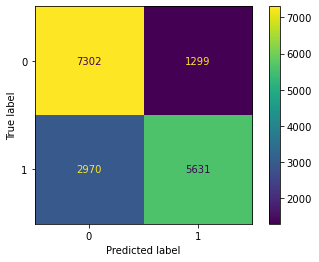

In [105]:
rf2_pred_test = rf2_best.predict(X_train_2_resampled)
ConfusionMatrixMetrics(y_train_2_resampled,rf2_pred_test)

Accuracy: 0.7206
Sensitivity/ Recall: 0.5521
Specificity: 0.7314
Precision: 0.1170
F1 score: 0.1931


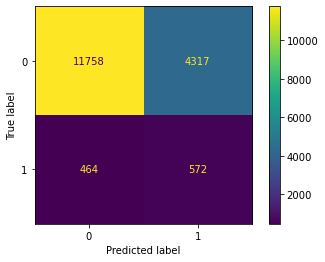

In [106]:
rf2_pred = rf2_best.predict(X_test_2 )

ConfusionMatrixMetrics(y_test_2, rf2_pred)

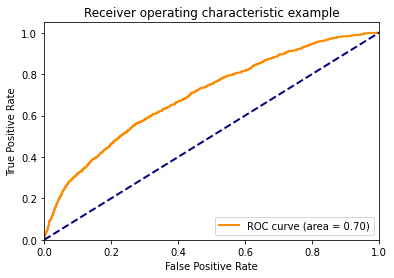

In [107]:
rf2_pred_prob = rf2_best.predict_proba(X_test_2)
PlotRocCurve(y_test_2,rf2_pred_prob)

In [108]:
#Find feature importance
rf2_feature_importance = rf2_best.feature_importances_
rf2_feature_importance

array([0.14057942, 0.15851607, 0.07337326, 0.07822234, 0.07046612,
       0.05659076, 0.04755375, 0.04785721, 0.06738121, 0.04591252,
       0.07522849, 0.08516558, 0.05315327])

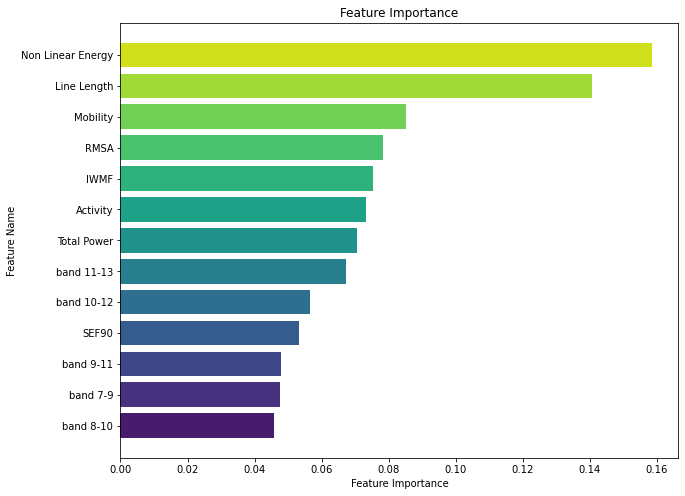

In [109]:
PlotFeatureImportance(rf2_feature_importance, important_feature_names)

# Find features for test data

In [110]:
test_data =   pd.read_csv('Test-EEG75_Cz-C3_Processed.csv')
test_labels = pd.read_csv('Test-Annotation_Cz-C3-EEG75.csv')

In [111]:
NEpoch = 256
Noverlap=128
numberofEpochs_2 = (len(test_data)-NEpoch)//(NEpoch-Noverlap) + 1 # Use integer divison // to get exact number of epochs
numberofEpochs_2

983

In [112]:
len(test_data) , len(test_labels)

(126032, 3952)

In [ ]:
featuretime_2= np.arange(1,numberofEpochs_2+1,1)*4

y_test_final = test_labels["Cz-C3"].to_numpy()[featuretime_2]

In [ ]:
epochstart=0
LL_Feature_test= NLE_Feature_test=Activity_Feature_test = RMSA_Feature_test= TP_Feature_test=BW_Feature_test= SEF90_Feature_test= SEF85_Feature_test =SEF95_Feature_test =Mobility_Feature_test=FM_Feature_test=PF_Feature_test=Complexity_Feature_test = np.array([])
band02_Feature_test=band13_Feature_test=band24_Feature_test =band35_Feature_test =band46_Feature_test =band57_Feature_test =band68_Feature_test =band79_Feature_test =band810_Feature_test =band911_Feature_test =band1012_Feature_test =band1113_Feature_test = np.array([])
for i in range(numberofEpochs_2):
    Epoch= test_data.loc[epochstart:epochstart+NEpoch-1,"value"].to_numpy()
    epochstart += Noverlap
    LL_Feature_test=np.append(LL_Feature_test,LLcalculation(NEpoch, Epoch))
    NLE_Feature_test=np.append(NLE_Feature_test,NLEcalculation(NEpoch, Epoch))
    Activity_Feature_test = np.append(Activity_Feature_test,Activitycalculation(NEpoch, Epoch))
    RMSA_Feature_test = np.append(RMSA_Feature_test,RMSAcalculation(NEpoch, Epoch))
    PSD_test = periodogram(Epoch,fs=32,window='hann',detrend=False)[1]
    TP_Feature_test = np.append(TP_Feature_test,tpcalculation(PSD_test,NEpoch))
    SEF90_Feature_test = np.append(SEF90_Feature_test, SEF90calculation(PSD_test, 32, NEpoch))
    SEF85_Feature_test = np.append(SEF85_Feature_test, SEF85calculation(PSD_test, 32, NEpoch))
    SEF95_Feature_test = np.append(SEF95_Feature_test, SEF95calculation(PSD_test, 32, NEpoch))

    BW_Feature_test = np.append(BW_Feature_test,bwcalculation(PSD_test, 32, NEpoch))
    Mobility_Feature_test = np.append(Mobility_Feature_test, Mobilitycalculation(NEpoch, Epoch))
    FM_Feature_test = np.append(FM_Feature_test,fmcalculation(PSD_test, 32, NEpoch))
    PF_Feature_test=np.append(PF_Feature_test,pfcalculation(PSD_test, 32, NEpoch))
    Complexity_Feature_test=np.append(Complexity_Feature_test, Complexitycalculation(NEpoch, Epoch))
    
    band02_Feature_test=np.append(band02_Feature_test,bandpowercalculation(PSD_test, 32, ([0,2])))
    band13_Feature_test=np.append(band13_Feature_test,bandpowercalculation(PSD_test, 32, ([1,3])))
    band24_Feature_test=np.append(band24_Feature_test,bandpowercalculation(PSD_test, 32, ([2,4])))
    band35_Feature_test=np.append(band35_Feature_test,bandpowercalculation(PSD_test, 32, ([3,5])))
    band46_Feature_test=np.append(band46_Feature_test,bandpowercalculation(PSD_test, 32, ([4,6])))
    band57_Feature_test=np.append(band57_Feature_test,bandpowercalculation(PSD_test, 32, ([5,7])))
    band68_Feature_test=np.append(band68_Feature_test,bandpowercalculation(PSD_test, 32, ([6,8])))
    band79_Feature_test=np.append(band79_Feature_test,bandpowercalculation(PSD_test, 32, ([7,9])))
    band810_Feature_test=np.append(band810_Feature_test,bandpowercalculation(PSD_test, 32, ([8,10])))
    band911_Feature_test=np.append(band911_Feature_test,bandpowercalculation(PSD_test, 32, ([9,11])))
    band1012_Feature_test=np.append(band1012_Feature_test,bandpowercalculation(PSD_test, 32, ([10,12])))
    band1113_Feature_test=np.append(band1113_Feature_test,bandpowercalculation(PSD_test, 32, ([11,13])))
    

In [ ]:
len(SEF90_Feature_test)

In [ ]:

important_test_features = np.column_stack((LL_Feature_test, NLE_Feature_test, Activity_Feature_test, RMSA_Feature_test,TP_Feature_test, band1012_Feature_test,
                                        band79_Feature_test, band911_Feature_test, band1113_Feature_test, band810_Feature_test,
                                       FM_Feature_test, Mobility_Feature_test, SEF90_Feature_test))



# full_test_features = np.column_stack((LL_Feature_test, RMSA_Feature_test,NLE_Feature_test,
#                              Activity_Feature_test, Mobility_Feature_test, Complexity_Feature_test,
#                              FM_Feature_test,BW_Feature_test, TP_Feature_test, PF_Feature_test, SEF90_Feature_test, SEF85_Feature_test, SEF95_Feature_test,
#                             band02_Feature_test, band13_Feature_test, band24_Feature_test, band35_Feature_test, band46_Feature_test, 
#                             band57_Feature_test, band68_Feature_test, band79_Feature_test, band810_Feature_test, band911_Feature_test,
#                             band1012_Feature_test, band1113_Feature_test))

# important_test_features = np.column_stack((LL_Feature_test, NLE_Feature_test, Activity_Feature_test, RMSA_Feature_test,TP_Feature_test, band1012_Feature_test,
#                                        band79_Feature_test, band911_Feature_test, band1113_Feature_test, band810_Feature_test))
#                                       #FM_Feature_test, Mobility_Feature_test, SEF90_Feature_test, band24_Feature_test))




np.shape(important_test_features)

In [ ]:
rf2_pred_test = rf2_best.predict(important_test_features)

ConfusionMatrixMetrics(y_test_final, rf2_pred_test)